In [1]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np

import sys
sys.path.append('../code/')
import preprocess
import qc

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from scipy.stats import spearmanr

### 4x4 QC

In [35]:
data = pd.read_csv('../data/small_scale/small_scale_matrix_dt_HGNC.csv', 
                                 sep=',', header=0, index_col=0)
sample_meta = pd.read_csv('../data/small_scale/small_scale_meta_dt.csv',
                        sep=',', header=0, index_col=0)
gene_meta = pd.DataFrame(index=data.index)

In [36]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta, False)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


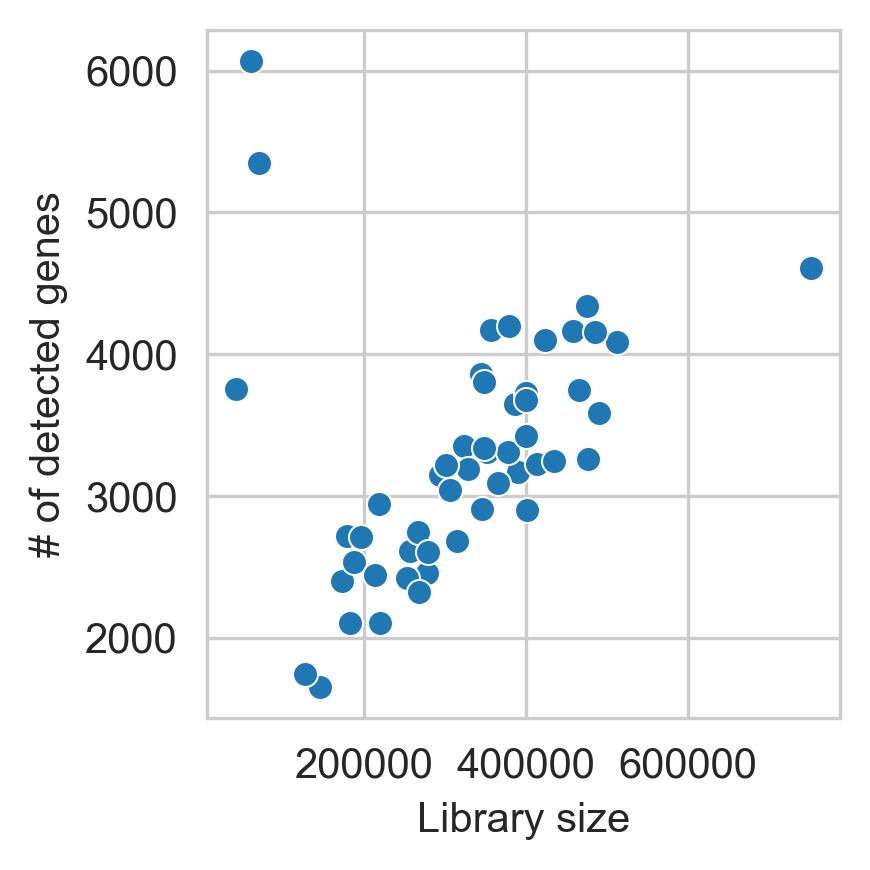

In [37]:
plt.figure(figsize=(3,3), dpi=300)
sns.scatterplot(sample_meta['Library_size'], sample_meta['Genes_expressed'])
plt.xlabel('Library size')
plt.ylabel('# of detected genes')
plt.tight_layout()
plt.savefig('../figures/QC4x4/f1.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


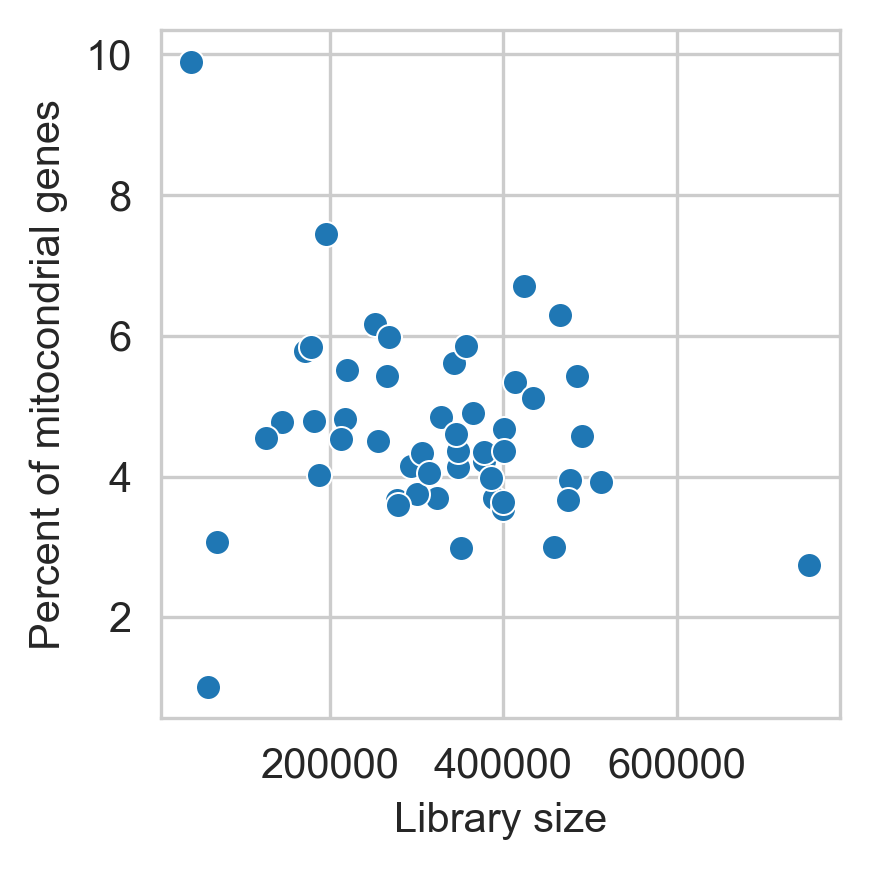

In [38]:
plt.figure(figsize=(3,3), dpi=300)
sns.scatterplot(sample_meta['Library_size'], sample_meta['Percent MT']*100)
plt.xlabel('Library size')
plt.ylabel('Percent of mitocondrial genes')
plt.tight_layout()
plt.savefig('../figures/QC4x4/f2.pdf')

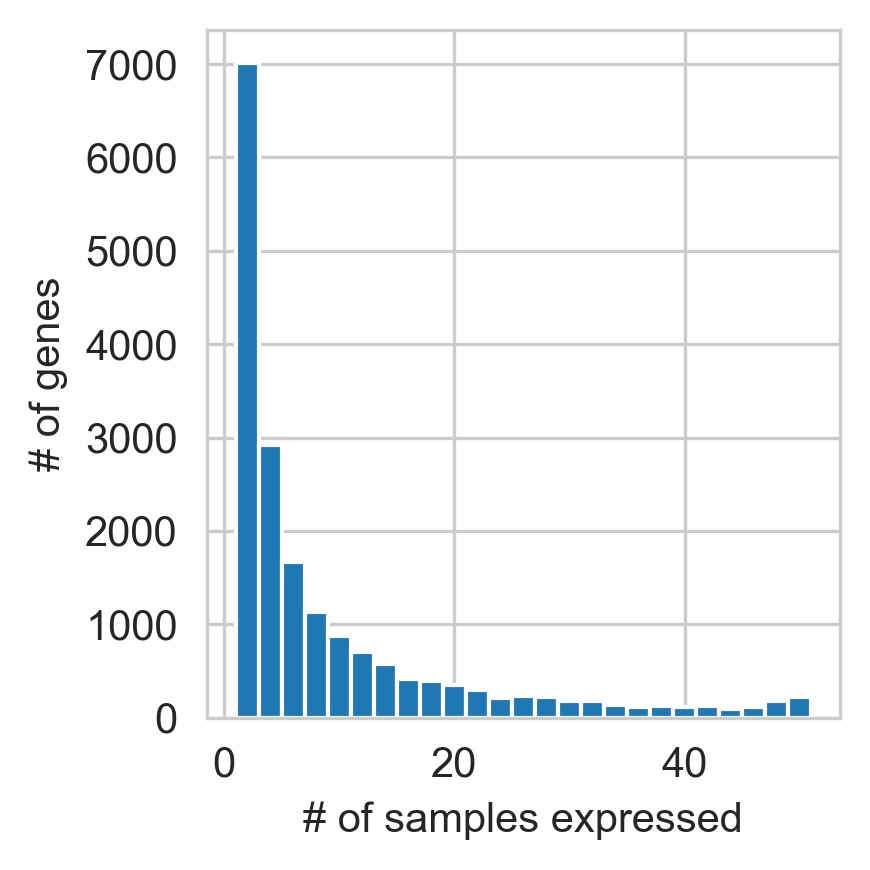

In [39]:
plt.figure(figsize=(3,3), dpi=300)
plt.hist(gene_meta['Expressed_samples'], bins=25)
plt.xlabel('# of samples expressed')
plt.ylabel('# of genes')
plt.tight_layout()
plt.savefig('../figures/QC4x4/f3.pdf')


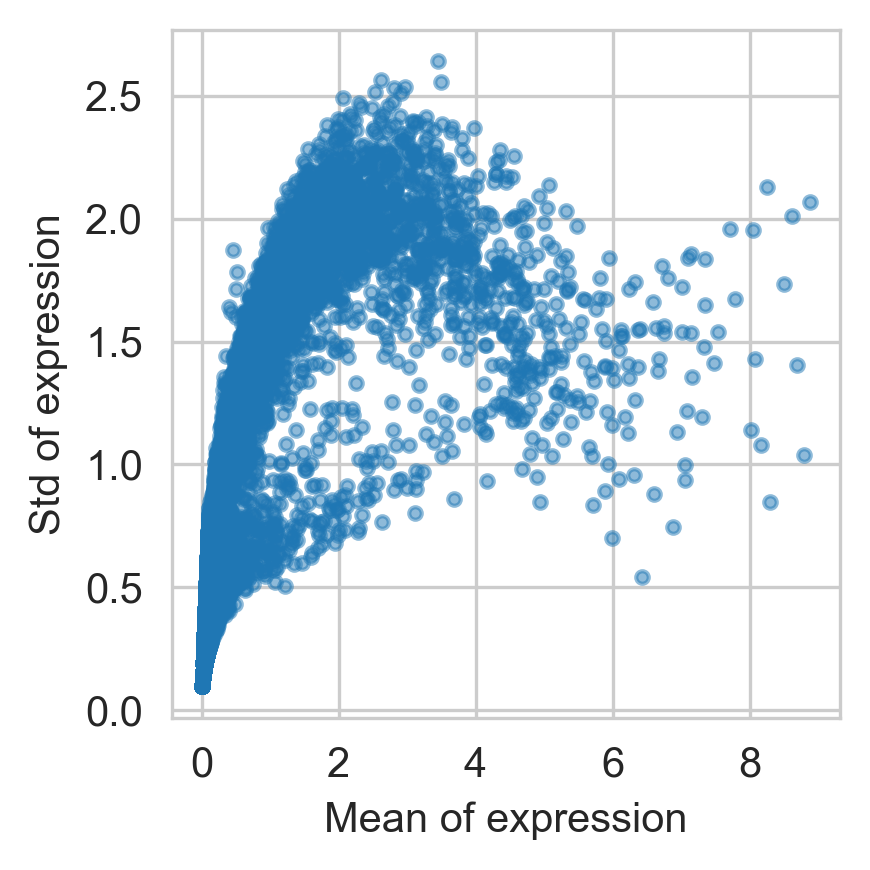

In [45]:
plt.figure(figsize=(3,3), dpi=300)
plt.plot(np.log1p(data).mean(1), np.log1p(data).std(1), '.', alpha=0.5)
plt.xlabel('Mean of expression')
plt.ylabel('Std of expression')
plt.tight_layout()
plt.savefig('../figures/QC4x4/f4.pdf')


In [50]:
sample_meta['Library_size'].median(), sample_meta['Genes_expressed'].median()

(343572.0, 3229.0)

### 4x4 QCrev

In [52]:
data = pd.read_csv('../data/small_scale/small_scale_matrix_bio_HGNC.csv', 
                                 sep=',', header=0, index_col=0)
sample_meta = pd.read_csv('../data/small_scale/small_scale_meta_bio.csv',
                        sep=',', header=0, index_col=0)
gene_meta = pd.DataFrame(index=data.index)
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta, False)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


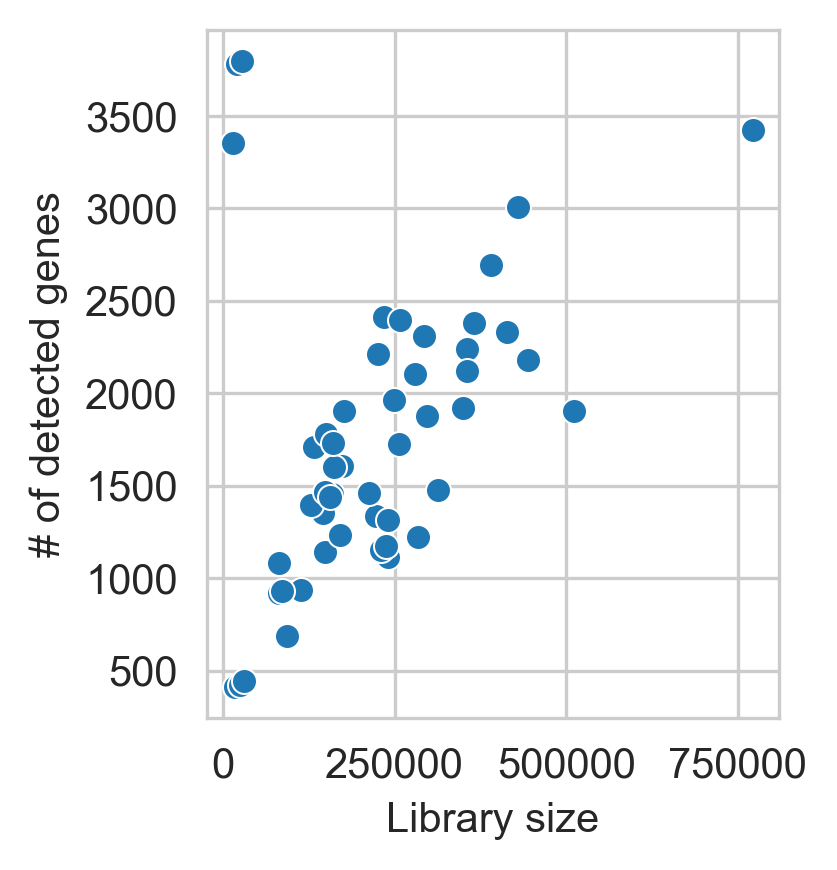

In [53]:
plt.figure(figsize=(3,3), dpi=300)
sns.scatterplot(sample_meta['Library_size'], sample_meta['Genes_expressed'])
plt.xlabel('Library size')
plt.ylabel('# of detected genes')
plt.tight_layout()
plt.savefig('../figures/QC4x4rev/f1.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


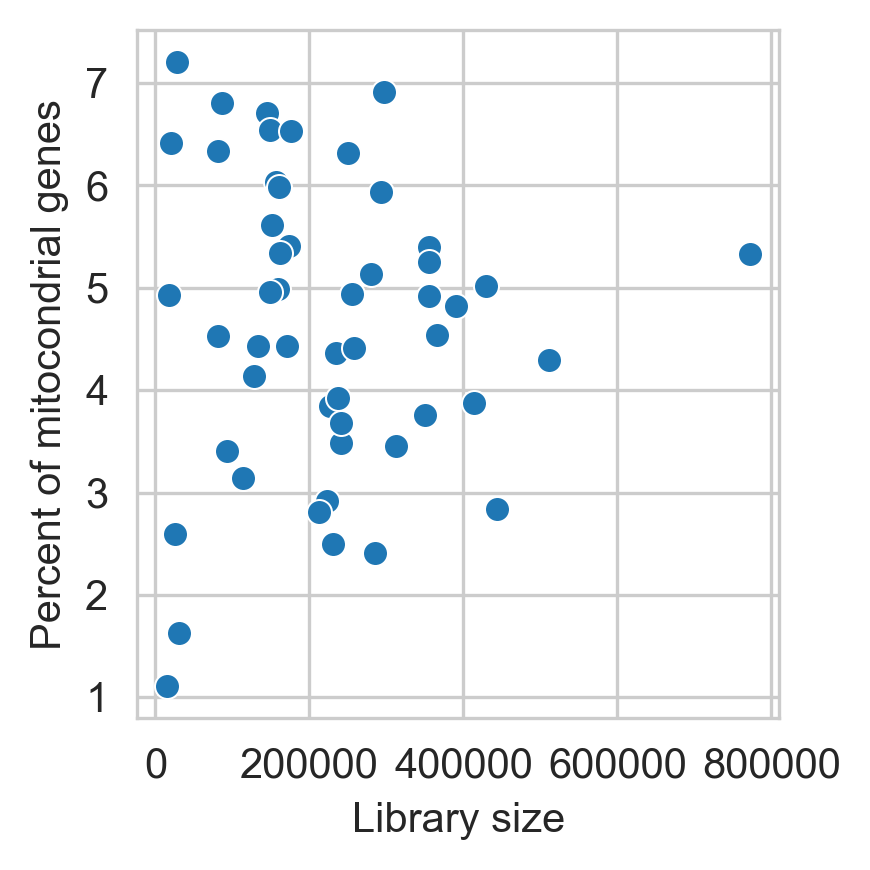

In [54]:
plt.figure(figsize=(3,3), dpi=300)
sns.scatterplot(sample_meta['Library_size'], sample_meta['Percent MT']*100)
plt.xlabel('Library size')
plt.ylabel('Percent of mitocondrial genes')
plt.tight_layout()
plt.savefig('../figures/QC4x4rev/f2.pdf')

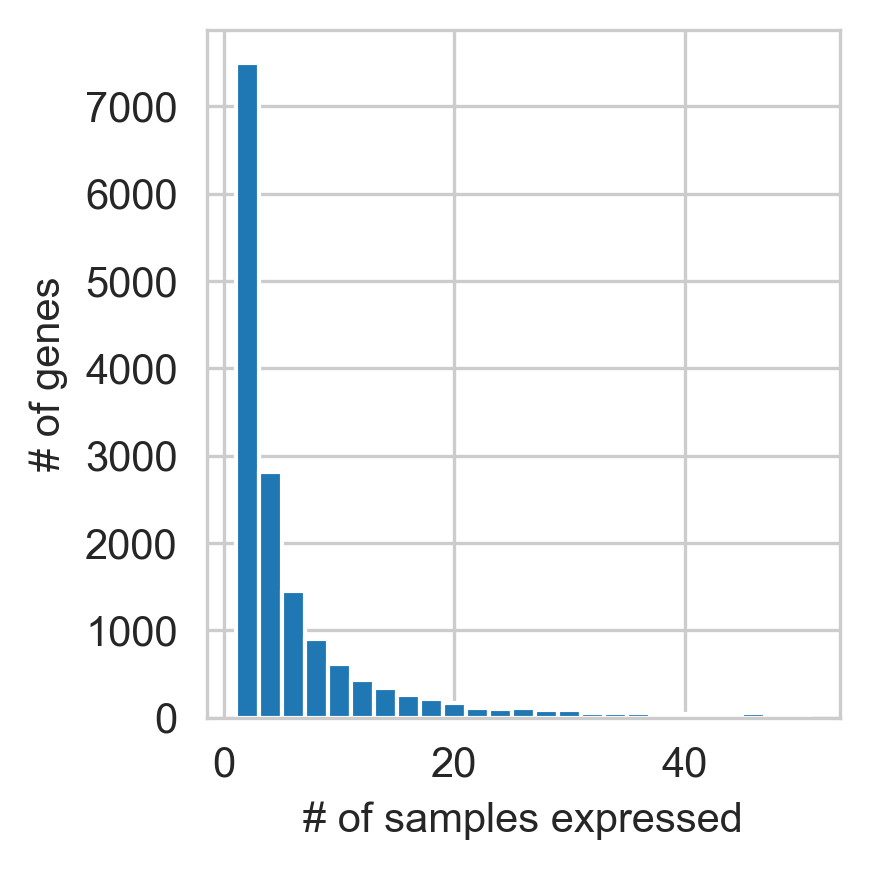

In [55]:
plt.figure(figsize=(3,3), dpi=300)
plt.hist(gene_meta['Expressed_samples'], bins=25)
plt.xlabel('# of samples expressed')
plt.ylabel('# of genes')
plt.tight_layout()
plt.savefig('../figures/QC4x4rev/f3.pdf')

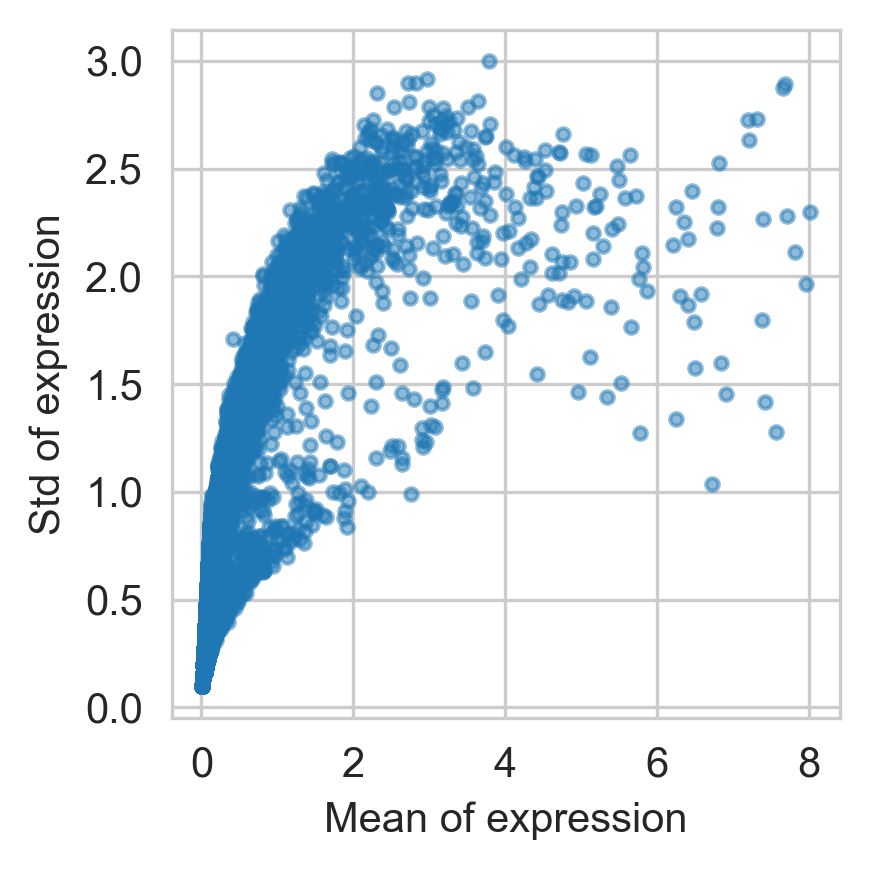

In [56]:
plt.figure(figsize=(3,3), dpi=300)
plt.plot(np.log1p(data).mean(1), np.log1p(data).std(1), '.', alpha=0.5)
plt.xlabel('Mean of expression')
plt.ylabel('Std of expression')
plt.tight_layout()
plt.savefig('../figures/QC4x4rev/f4.pdf')

### 4x4 analysis

In [92]:
data = pd.read_csv('../results/small_scale/filtered_dt_HGNC_counts_30_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results/small_scale/filtered_dt_HGNC_meta_30.csv', sep=',', header=0, index_col=0)
#remove outlier
data = data.drop('Run_1_dT_DMSO_ImatinibReadsPerGene', 0)
meta = meta.loc[data.index]

In [93]:
fil = meta['Drug1'] == 'YM115'
meta.loc[meta.index[fil], 'Drug1'] = 'YM155'
fil = meta['Drug2'] == 'YM115'
meta.loc[meta.index[fil], 'Drug2'] = 'YM155'

In [94]:
model = PCA()
data_pca = pd.DataFrame(model.fit_transform(data), index=data.index)
np.random.seed(19890904)
model = TSNE(perplexity=30, learning_rate=40)
data_tsne = pd.DataFrame(model.fit_transform(data_pca), index=data.index)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

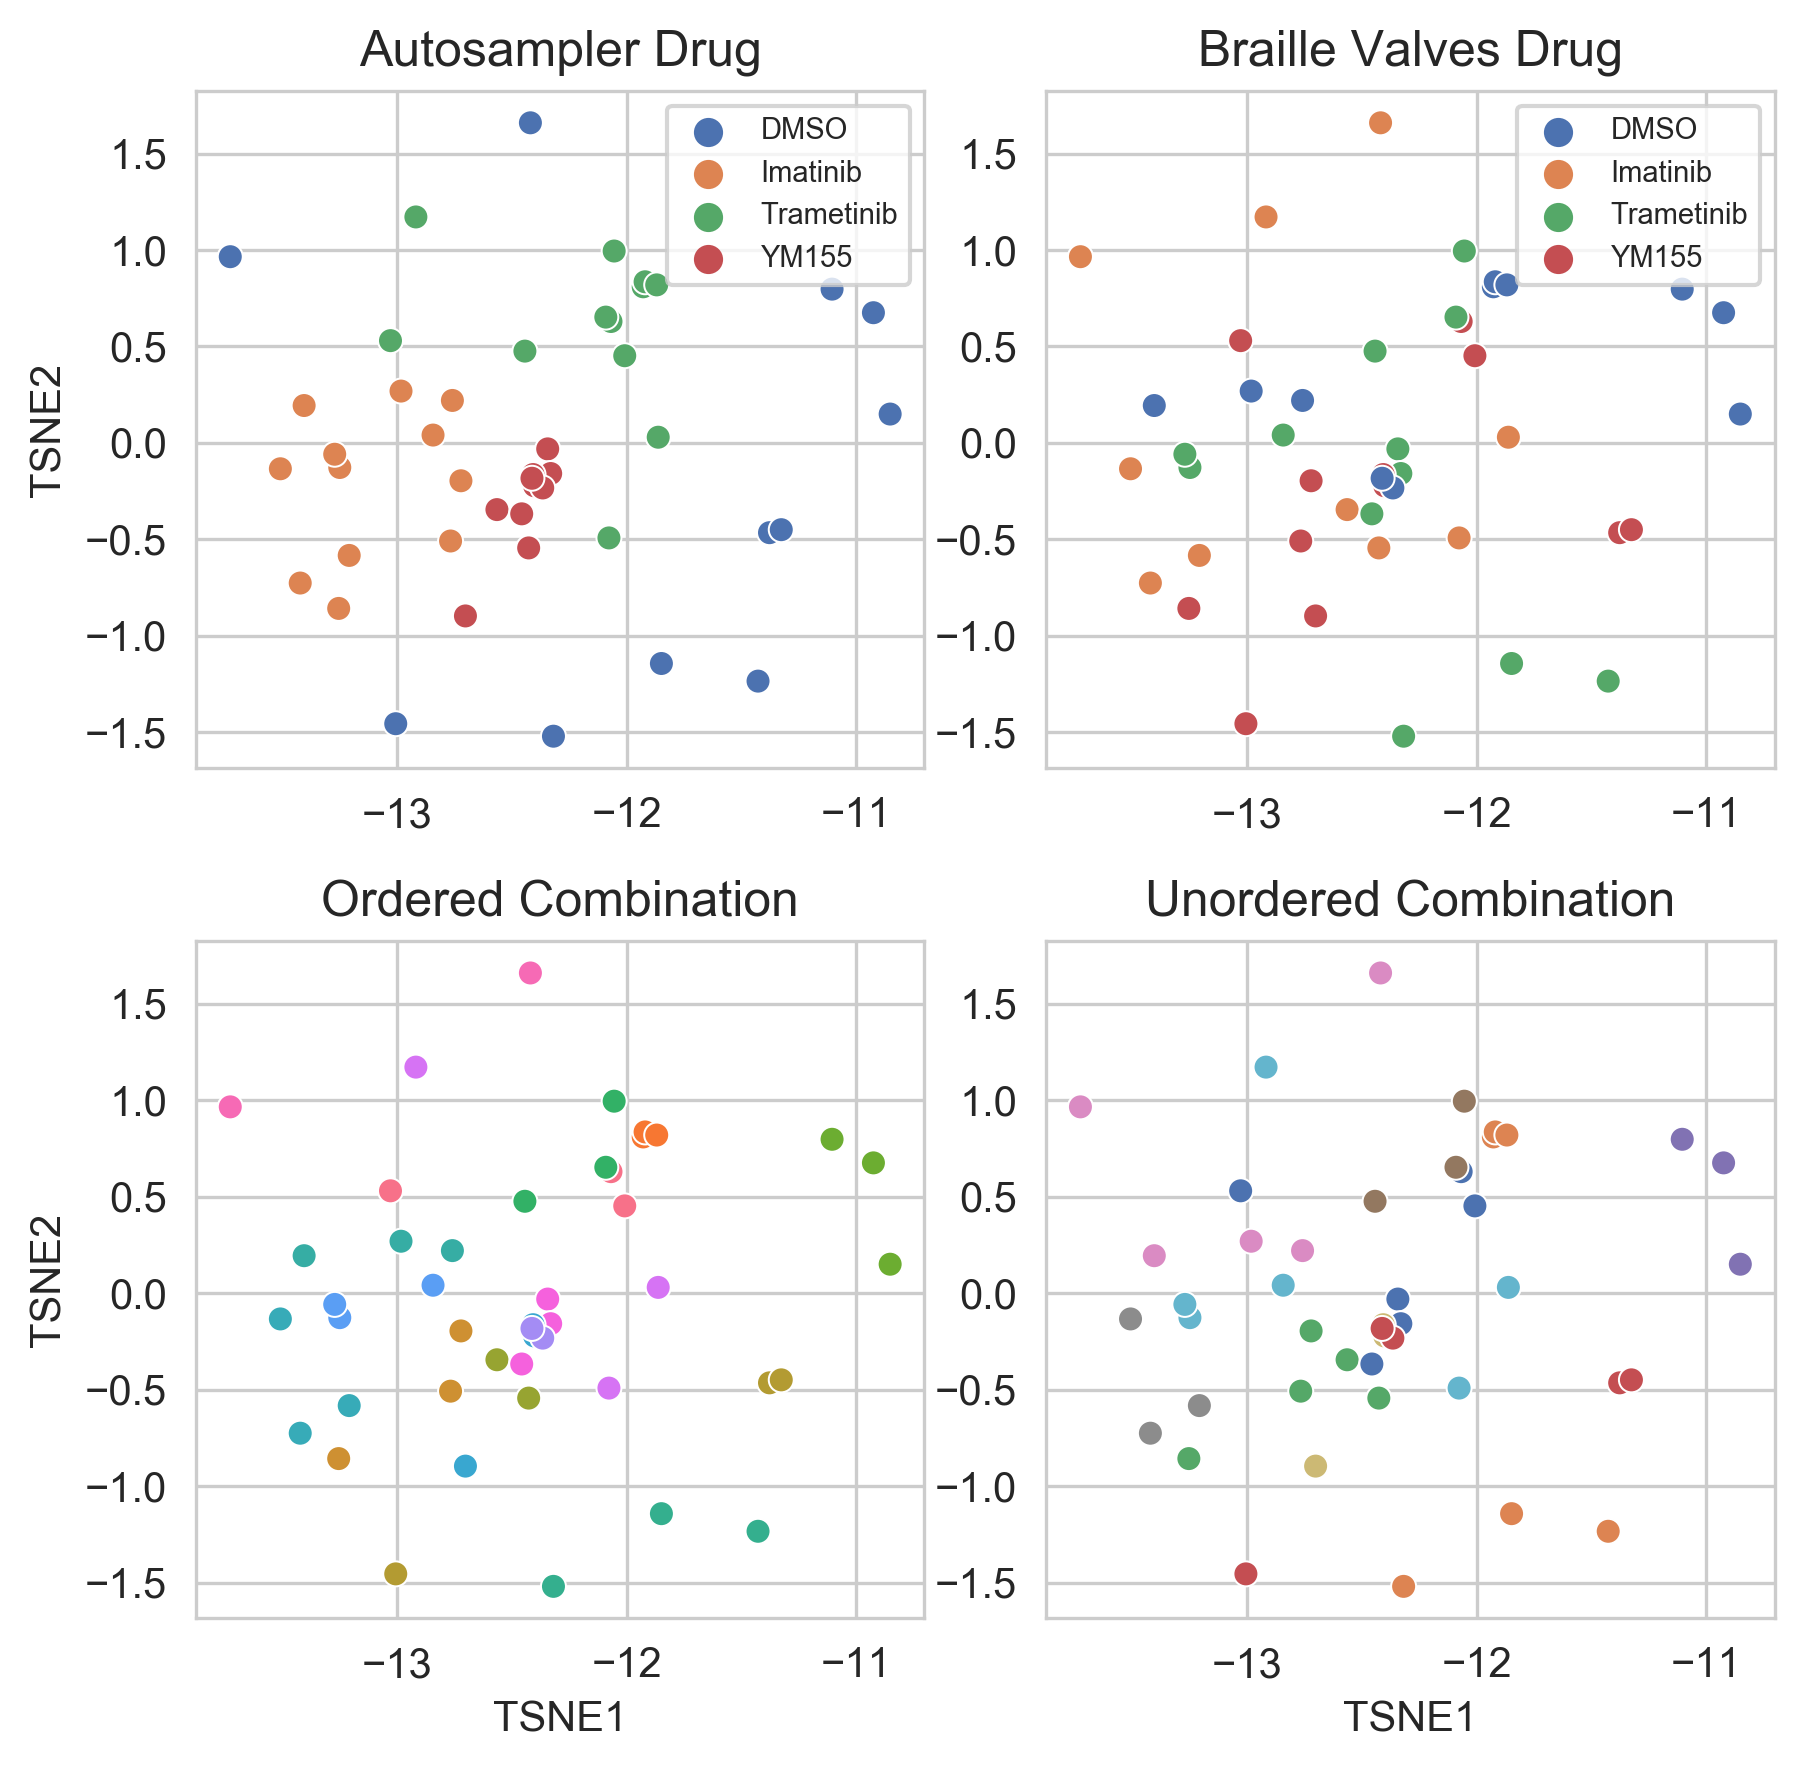

In [95]:
f, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=300)
sns.set_palette('deep')
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Drug1'], ax=axs[0, 0], 
               hue_order=['DMSO', 'Imatinib', 'Trametinib', 'YM155'])
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Drug2'], ax=axs[0, 1],
               hue_order=['DMSO', 'Imatinib', 'Trametinib', 'YM155'])
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Combo'], ax=axs[1, 0])
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Ordered'], ax=axs[1, 1])
axs[0, 0].legend(fontsize=7)
axs[0, 1].legend(fontsize=7)
axs[1, 0].legend().remove()
axs[1, 1].legend().remove()
axs[0, 0].set_title('Autosampler Drug')
axs[0, 1].set_title('Braille Valves Drug')
axs[1, 0].set_title('Ordered Combination')
axs[1, 1].set_title('Unordered Combination')
for i in (0, 1):
    for j in (0, 1):
        if i==0:
            axs[i, j].set_xlabel('')
        else:
            axs[i, j].set_xlabel('TSNE1')
        if j==0:
            axs[i, j].set_ylabel('TSNE2')
        else:
            axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('../figures/Fig4x4/f1.pdf')

In [96]:
results = pd.DataFrame(index=range(101), columns=['Drug1', 'Drug2', 'Combo', 'Ordered'])
for c in results.columns:
    results.loc[0, c] = silhouette_score(data_pca, meta[c])
np.random.seed(19890904)
for i in range(1, 101):
    indexes = np.random.permutation(data_pca.index)
    for c in results.columns:
        results.loc[i, c] = silhouette_score(data_pca.loc[indexes].values, meta[c].values)
results.columns = ['Autosampler\nDrug', 'Braille Valves\nDrug', 'Ordered\nCombination', 'Unordered\nCombination']
results['Randomised'] = results.index
results = pd.melt(results, id_vars='Randomised', value_vars=results.columns[:-1], 
                  var_name='Clustering', value_name='Normalised score')
fil = results['Randomised'] == 0
results.loc[results.index[fil], 'Randomised'] = False
results.loc[results.index[~fil], 'Randomised'] = True

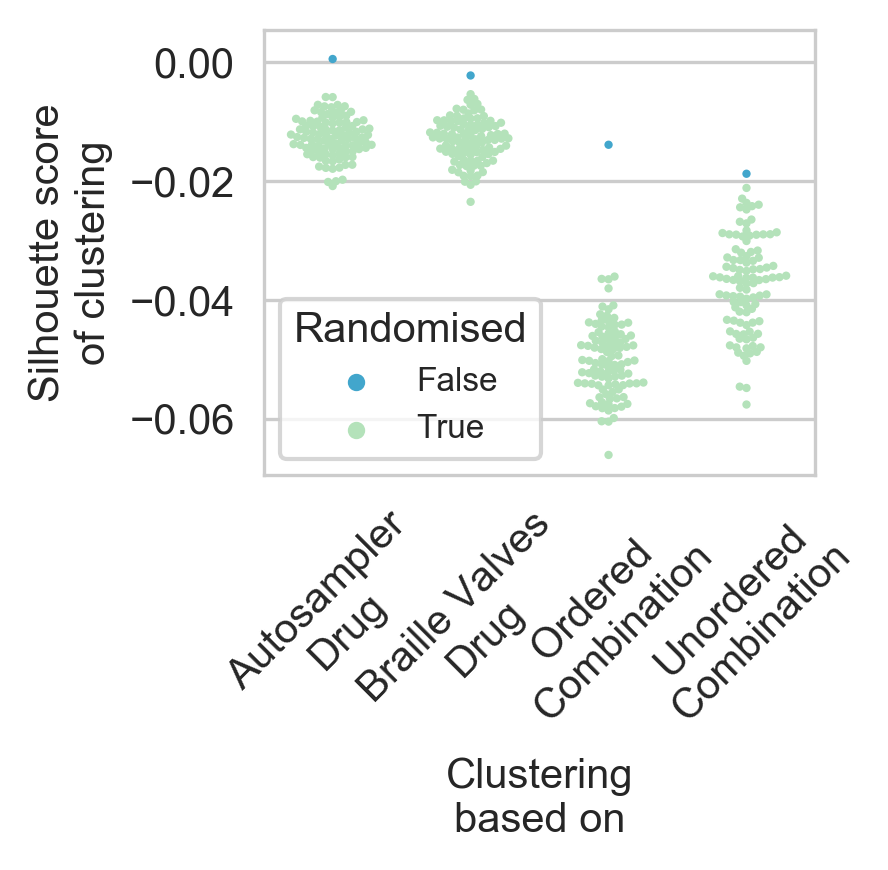

In [97]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('GnBu_r', 2)
sns.swarmplot(x=results['Clustering'], y=results['Normalised score'], hue=results['Randomised'],size=2)
plt.ylabel('Silhouette score\nof clustering')
plt.xticks(rotation=45)
plt.xlabel('Clustering\nbased on')
lgnd = plt.legend(fontsize=8, title='Randomised')
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
plt.tight_layout()
plt.savefig('../figures/Fig4x4/f2.pdf')

### 4x4 rev analysis

In [80]:
data = pd.read_csv('../results/small_scale/filtered_bio_HGNC_counts_10_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results/small_scale/filtered_bio_HGNC_meta_10.csv', sep=',', header=0, index_col=0)
#remove outlier
data = data.drop('Run_2_Bio_Imatinib_DMSOReadsPerGene', 0)
meta = meta.loc[data.index]

In [81]:
fil = meta['Drug1'] == 'YM115'
meta.loc[meta.index[fil], 'Drug1'] = 'YM155'
fil = meta['Drug2'] == 'YM115'
meta.loc[meta.index[fil], 'Drug2'] = 'YM155'

In [82]:
model = PCA()
data_pca = pd.DataFrame(model.fit_transform(data), index=data.index)
np.random.seed(19890904)
model = TSNE(perplexity=30, learning_rate=40)
data_tsne = pd.DataFrame(model.fit_transform(data_pca), index=data.index)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

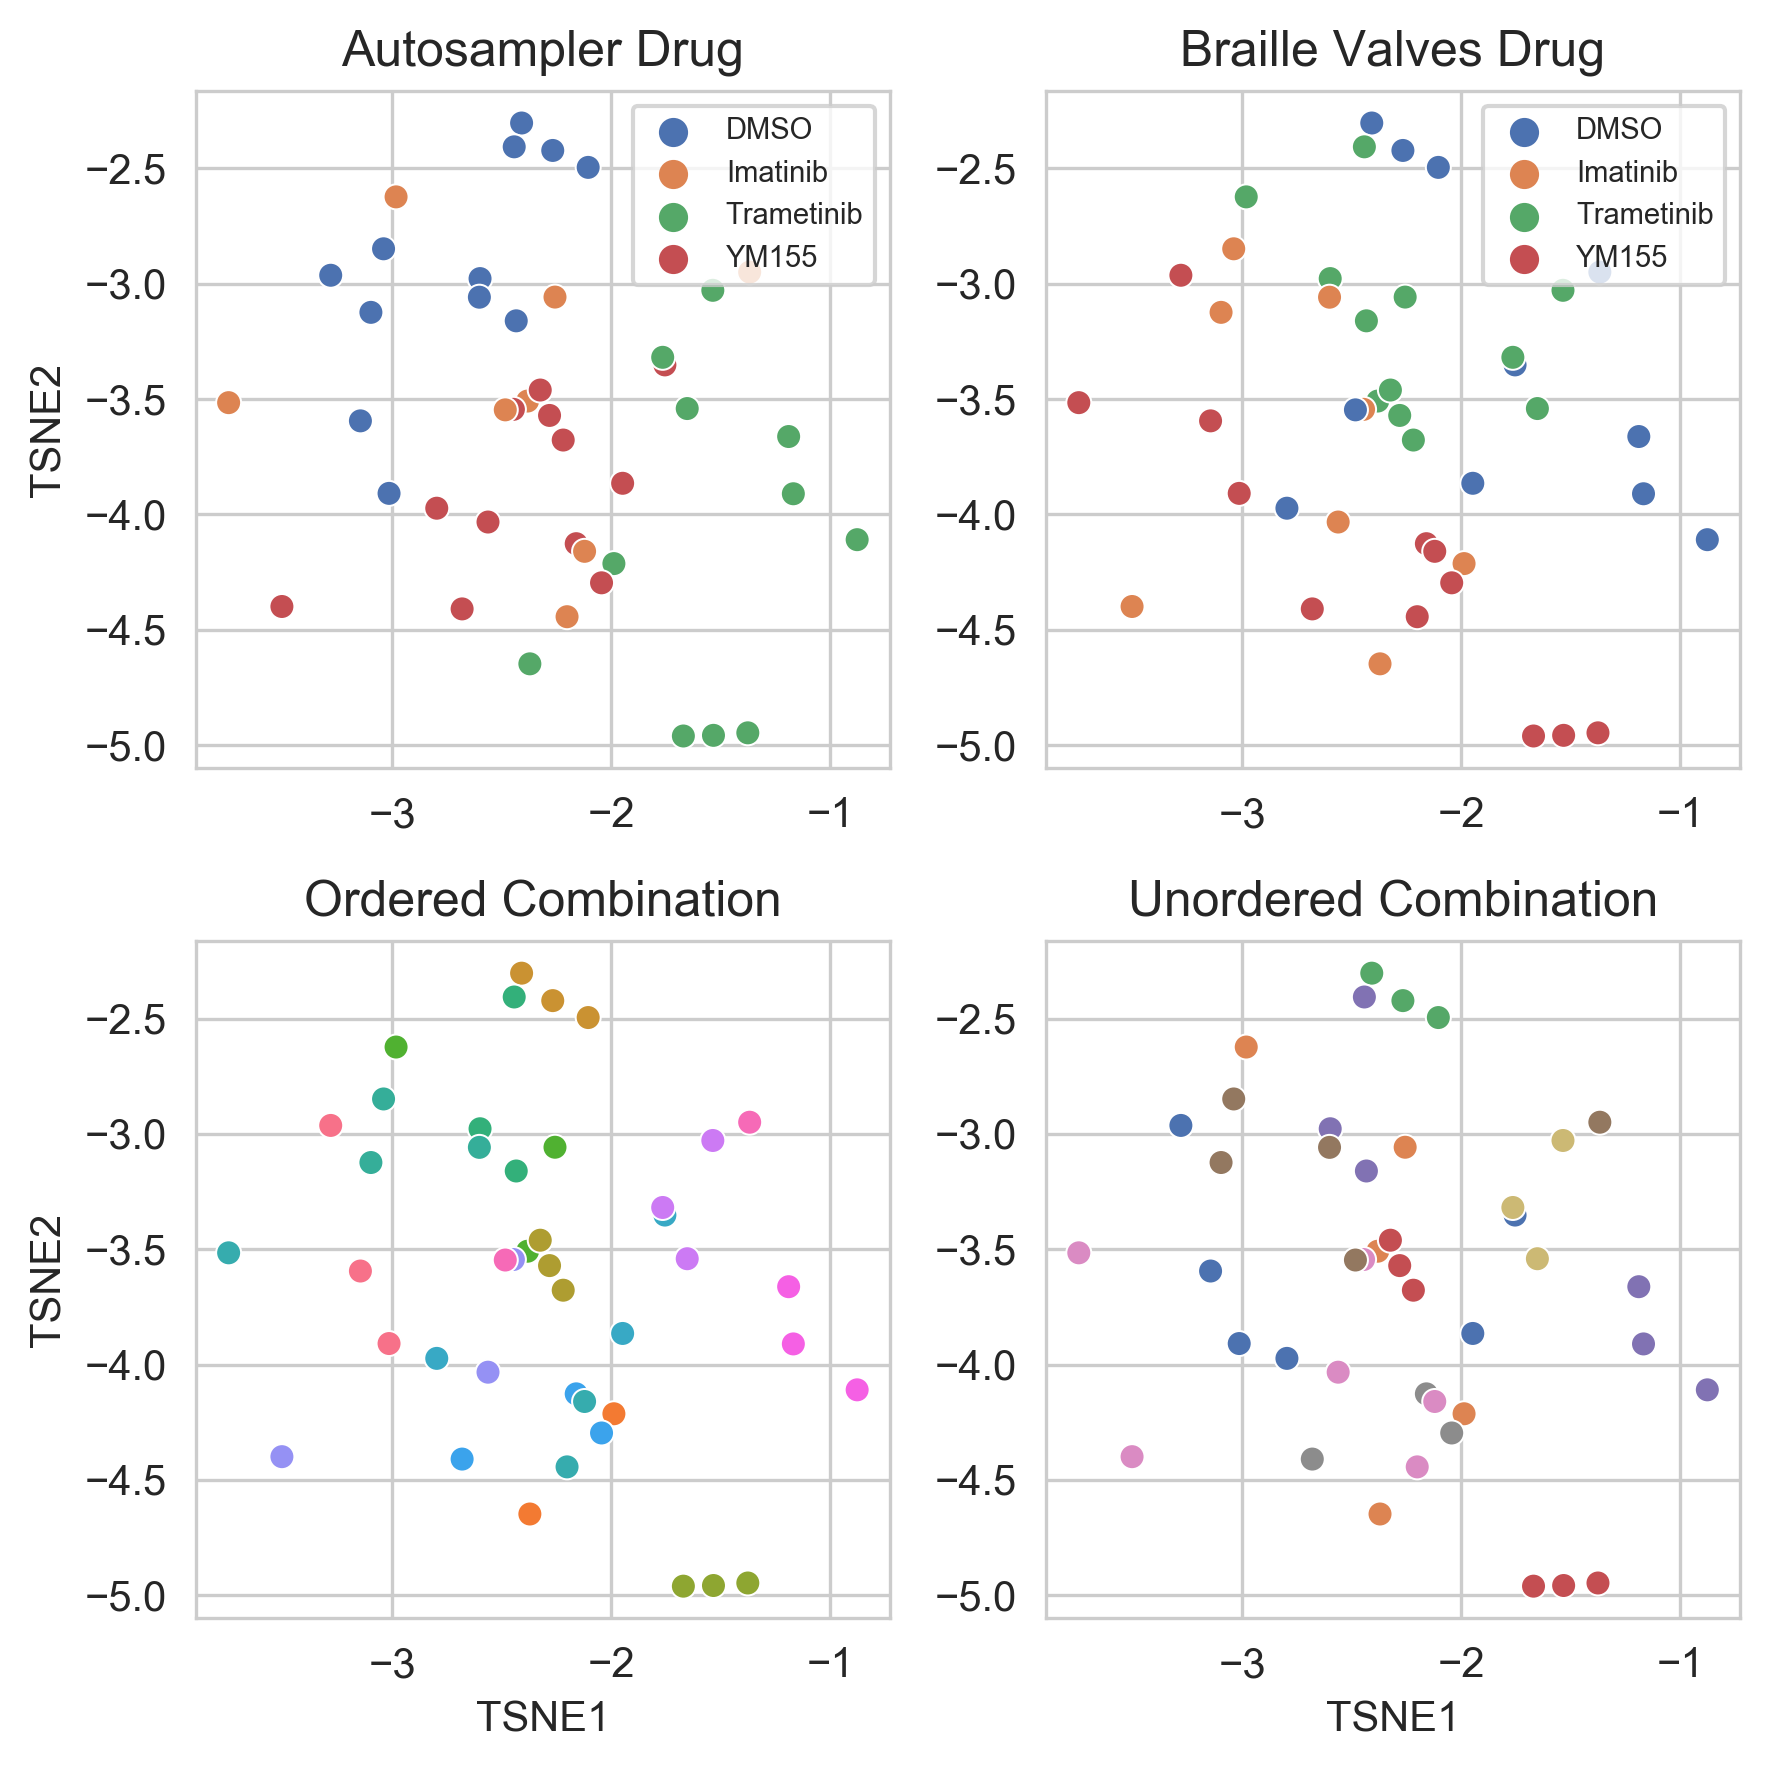

In [83]:
f, axs = plt.subplots(2, 2, figsize=(6, 6), dpi=300)
sns.set_palette('deep')
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Drug1'], ax=axs[0, 0], 
               hue_order=['DMSO', 'Imatinib', 'Trametinib', 'YM155'])
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Drug2'], ax=axs[0, 1],
               hue_order=['DMSO', 'Imatinib', 'Trametinib', 'YM155'])
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Combo'], ax=axs[1, 0])
sns.scatterplot(data_tsne[0], data_tsne[1], hue=meta['Ordered'], ax=axs[1, 1])
axs[0, 0].legend(fontsize=7)
axs[0, 1].legend(fontsize=7)
axs[1, 0].legend().remove()
axs[1, 1].legend().remove()
axs[0, 0].set_title('Autosampler Drug')
axs[0, 1].set_title('Braille Valves Drug')
axs[1, 0].set_title('Ordered Combination')
axs[1, 1].set_title('Unordered Combination')
for i in (0, 1):
    for j in (0, 1):
        if i==0:
            axs[i, j].set_xlabel('')
        else:
            axs[i, j].set_xlabel('TSNE1')
        if j==0:
            axs[i, j].set_ylabel('TSNE2')
        else:
            axs[i, j].set_ylabel('')
plt.tight_layout()
plt.savefig('../figures/Fig4x4rev//f1.pdf')

In [84]:
results = pd.DataFrame(index=range(101), columns=['Drug1', 'Drug2', 'Combo', 'Ordered'])
for c in results.columns:
    results.loc[0, c] = silhouette_score(data_pca, meta[c])
np.random.seed(19890904)
for i in range(1, 101):
    indexes = np.random.permutation(data_pca.index)
    for c in results.columns:
        results.loc[i, c] = silhouette_score(data_pca.loc[indexes].values, meta[c].values)
results.columns = ['Autosampler\nDrug', 'Braille Valves\nDrug', 'Ordered\nCombination', 'Unordered\nCombination']
results['Randomised'] = results.index
results = pd.melt(results, id_vars='Randomised', value_vars=results.columns[:-1], 
                  var_name='Clustering', value_name='Normalised score')
fil = results['Randomised'] == 0
results.loc[results.index[fil], 'Randomised'] = False
results.loc[results.index[~fil], 'Randomised'] = True

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


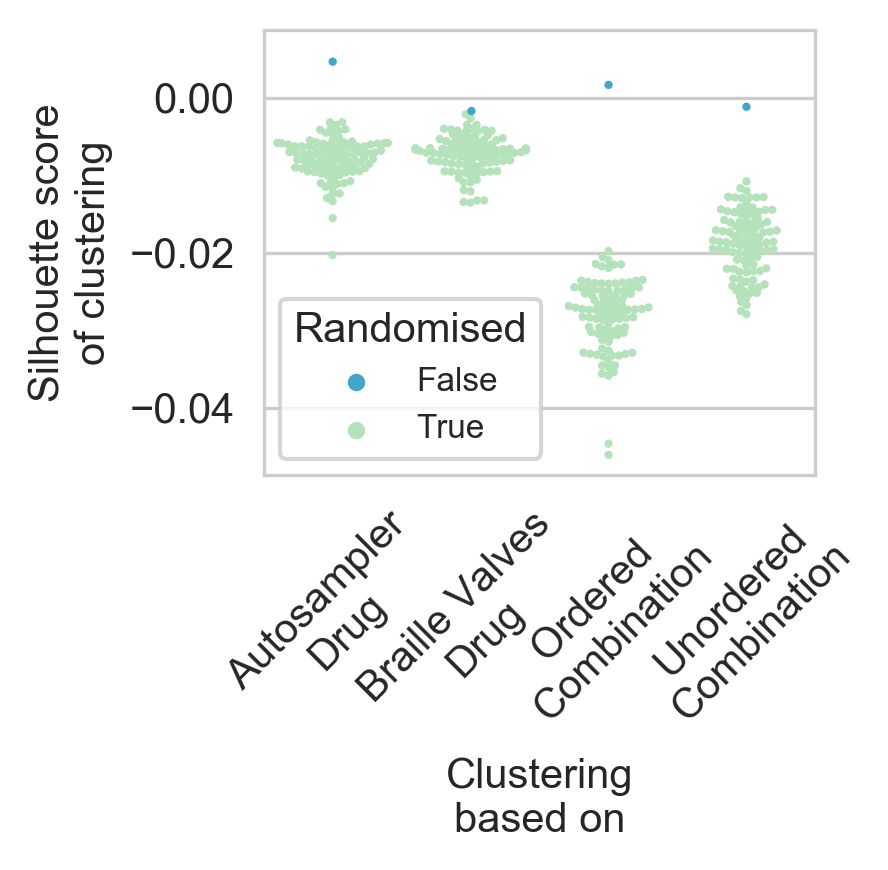

In [85]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('GnBu_r', 2)
sns.swarmplot(x=results['Clustering'], y=results['Normalised score'], hue=results['Randomised'],size=2)
plt.ylabel('Silhouette score\nof clustering')
plt.xticks(rotation=45)
plt.xlabel('Clustering\nbased on')
lgnd = plt.legend(fontsize=8, title='Randomised')
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
plt.tight_layout()
plt.savefig('../figures/Fig4x4rev//f2.pdf')

### Activity 4x4

In [2]:
data = pd.read_csv('../results/small_scale/filtered_dt_HGNC_counts_30_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results//small_scale/filtered_dt_HGNC_meta_30.csv', sep=',', header=0, index_col=0)
meta = meta.loc[data.index]
#remove outlier
data = data.drop('Run_1_dT_DMSO_ImatinibReadsPerGene', 0)
fil = data.std() > 0
data = data[data.columns[fil]]
meta = meta.loc[data.index]

In [3]:
fil = meta['Drug1'] == 'YM115'
meta.loc[meta.index[fil], 'Drug1'] = 'YM155'
fil = meta['Drug2'] == 'YM115'
meta.loc[meta.index[fil], 'Drug2'] = 'YM155'

In [4]:
hm_col = sns.color_palette('YlGnBu', 3)
anno = pd.DataFrame('w', index=data.index, columns=list(set(meta['Drug1']) | set(meta['Drug2'])))
for i in meta.index:
    d1, d2 = meta.loc[i, ['Drug1', 'Drug2']]
    anno.loc[i, d1] = hm_col[0]
    anno.loc[i, d2] = hm_col[2]
    if d1 == d2:
        anno.loc[i, d1] = hm_col[1]

In [5]:
progeny = pd.read_csv('../data/external/progeny.csv', header=0, index_col=0)
progeny = pd.pivot_table(progeny, index='gene', columns='pathway', values='weight')
progeny[progeny.isna()] = 0.0
progeny['JAK'] = progeny['JAK-STAT']
del progeny['JAK-STAT']

In [6]:
genes = list(set(progeny.index) & set(data.columns))

In [7]:
data = data[genes]
progeny = progeny.loc[genes]

In [8]:
np.random.seed(19890904)
scores = np.zeros((10001, data.shape[0], progeny.shape[1]), float)
scores[0,:,:] = np.dot(data, progeny)
for i in range(1, 10001):
    data.columns = np.random.choice(data.columns, len(data.columns), False)
    data = data[genes]
    scores[i,:,:] = np.dot(data, progeny)

In [9]:
bg = scores[1:]
scores = scores[0]

In [10]:
scores = pd.DataFrame((scores - bg.mean(0)) / bg.std(0), index=data.index, columns=progeny.columns)

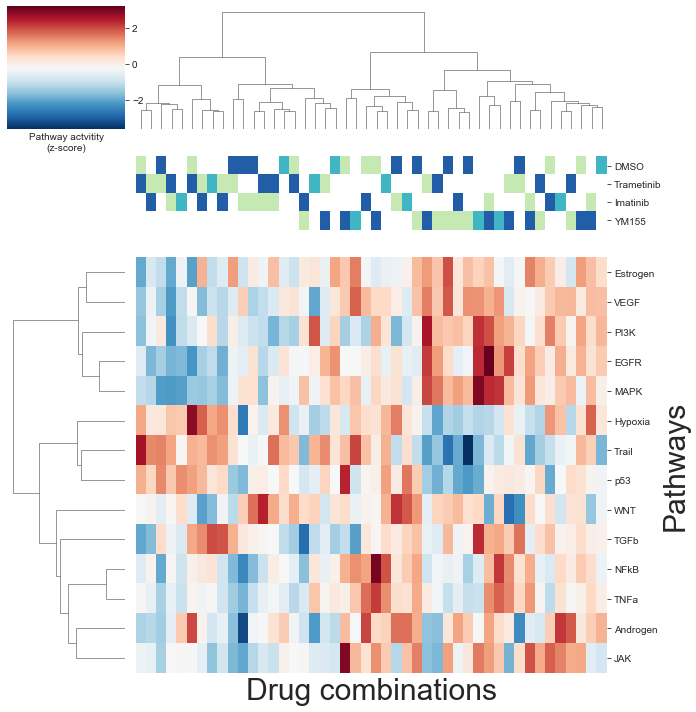

In [11]:
g = sns.clustermap(scores.T, method='ward',cmap='RdBu_r', col_colors=anno, xticklabels=False)
g.ax_heatmap.set_xlabel('Drug combinations',size=30)
g.ax_heatmap.set_ylabel('Pathways',size=30)
g.ax_cbar.set_xlabel('Pathway actvitity\n(z-score)',size=10)
plt.tight_layout()
#plt.savefig('../figures/Fig4x4/f3.pdf')

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
data = pd.merge(meta, scores, left_index=True, right_index=True)
for drug in list(set(data['Drug1'])|set(data['Drug2'])):
    data[drug] = 0
for i in data.index:
    d1, d2 = data.loc[i, ['Drug1', 'Drug2']]
    data.loc[i, [d1, d2]] = 1

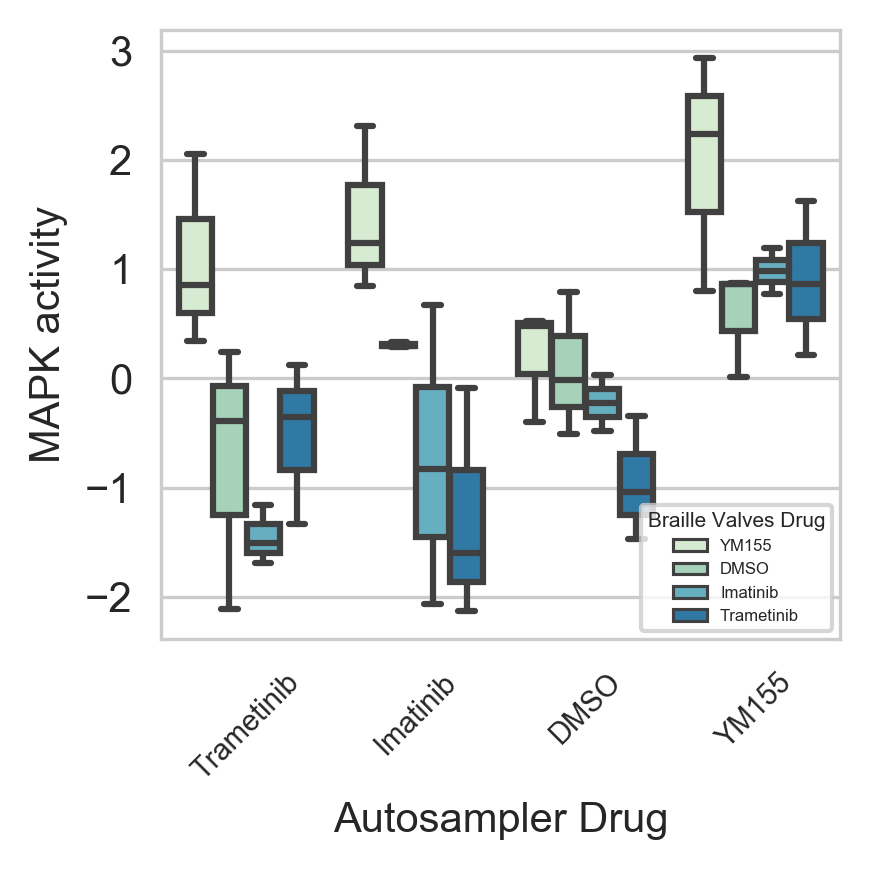

In [14]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('GnBu',4)
sns.boxplot(x=data['Drug1'], y=data['MAPK'], hue=data['Drug2'])
plt.xticks(rotation=45, size=7)
plt.xlabel('Autosampler Drug')
plt.ylabel('MAPK activity')
lgnd = plt.legend(fontsize=4, title='Braille Valves Drug', loc=4)
plt.setp(lgnd.get_title(),fontsize=5)
plt.tight_layout()
#plt.savefig('../figures/Fig4x4/f4.pdf')

In [17]:
results = pd.DataFrame(index=progeny.columns, columns = ['Imatinib', 'YM155', 'Trametinib'])
results_p = pd.DataFrame(index=progeny.columns, columns = ['Imatinib', 'YM155', 'Trametinib'])
for pw in progeny.columns:
    print(pw)
    model = ols(pw + ' ~ Imatinib + YM155 + Trametinib', data).fit()
    results.loc[pw] = model.params[results.columns]
    results_p.loc[pw] = model.pvalues[results_p.columns]

Androgen
EGFR
Estrogen
Hypoxia
MAPK
NFkB
PI3K
TGFb
TNFa
Trail
VEGF
WNT
p53
JAK


In [18]:
results_p

,Imatinib,YM155,Trametinib
pathway,,,
Androgen,0.487409,0.890509,0.0195675
EGFR,0.204439,0.00423869,0.0987697
Estrogen,0.958613,0.00916844,0.0666548
Hypoxia,0.972864,0.00289591,0.634128
MAPK,0.466872,8.19708e-06,0.0338701
NFkB,0.376705,0.214181,0.396023
PI3K,0.113081,0.0228692,0.53885
TGFb,0.833239,0.807066,0.674318
TNFa,0.666309,0.136191,0.579867


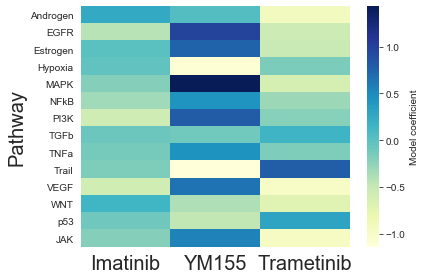

In [129]:
sns.heatmap(results.astype(float), cmap='YlGnBu', cbar_kws={'label': 'Model coefficient'})
plt.xticks(size=20)
plt.ylabel('Pathway', size=20)
plt.tight_layout()
plt.savefig('../figures/Fig4x4/f5.pdf')

### Activity 4x4rev

In [133]:
data = pd.read_csv('../results/small_scale/filtered_bio_HGNC_counts_10_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results/small_scale/filtered_bio_HGNC_meta_10.csv', sep=',', header=0, index_col=0)
#remove outlier
data = data.drop('Run_2_Bio_Imatinib_DMSOReadsPerGene', 0)
meta = meta.loc[data.index]

In [134]:
fil = meta['Drug1'] == 'YM115'
meta.loc[meta.index[fil], 'Drug1'] = 'YM155'
fil = meta['Drug2'] == 'YM115'
meta.loc[meta.index[fil], 'Drug2'] = 'YM155'

In [135]:
hm_col = sns.color_palette('YlGnBu', 3)
anno = pd.DataFrame('w', index=data.index, columns=list(set(meta['Drug1']) | set(meta['Drug2'])))
for i in meta.index:
    d1, d2 = meta.loc[i, ['Drug1', 'Drug2']]
    anno.loc[i, d1] = hm_col[0]
    anno.loc[i, d2] = hm_col[2]
    if d1 == d2:
        anno.loc[i, d1] = hm_col[1]

In [136]:
progeny = pd.read_csv('../data/external/progeny.csv', header=0, index_col=0)
progeny = pd.pivot_table(progeny, index='gene', columns='pathway', values='weight')
progeny[progeny.isna()] = 0.0
progeny['JAK'] = progeny['JAK-STAT']
del progeny['JAK-STAT']

In [139]:
genes = list(set(progeny.index) & set(data.columns))
data = data[genes]
progeny = progeny.loc[genes]

In [140]:
np.random.seed(19890904)
scores = np.zeros((10001, data.shape[0], progeny.shape[1]), float)
scores[0,:,:] = np.dot(data, progeny)
for i in range(1, 10001):
    data.columns = np.random.choice(data.columns, len(data.columns), False)
    data = data[genes]
    scores[i,:,:] = np.dot(data, progeny)

In [141]:
bg = scores[1:]
scores = scores[0]

In [142]:
scores = pd.DataFrame((scores - bg.mean(0)) / bg.std(0), index=data.index, columns=progeny.columns)

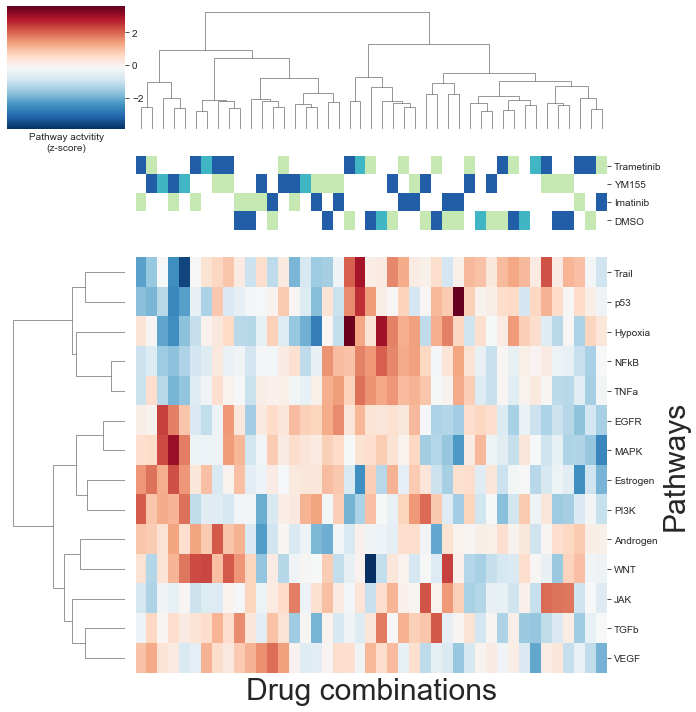

In [143]:
g = sns.clustermap(scores.T, method='ward',cmap='RdBu_r', col_colors=anno, xticklabels=False)
g.ax_heatmap.set_xlabel('Drug combinations',size=30)
g.ax_heatmap.set_ylabel('Pathways',size=30)
g.ax_cbar.set_xlabel('Pathway actvitity\n(z-score)',size=10)
plt.tight_layout()
plt.savefig('../figures/Fig4x4rev//f3.pdf')

In [144]:
data = pd.merge(meta, scores, left_index=True, right_index=True)
for drug in list(set(data['Drug1'])|set(data['Drug2'])):
    data[drug] = 0
for i in data.index:
    d1, d2 = data.loc[i, ['Drug1', 'Drug2']]
    data.loc[i, [d1, d2]] = 1

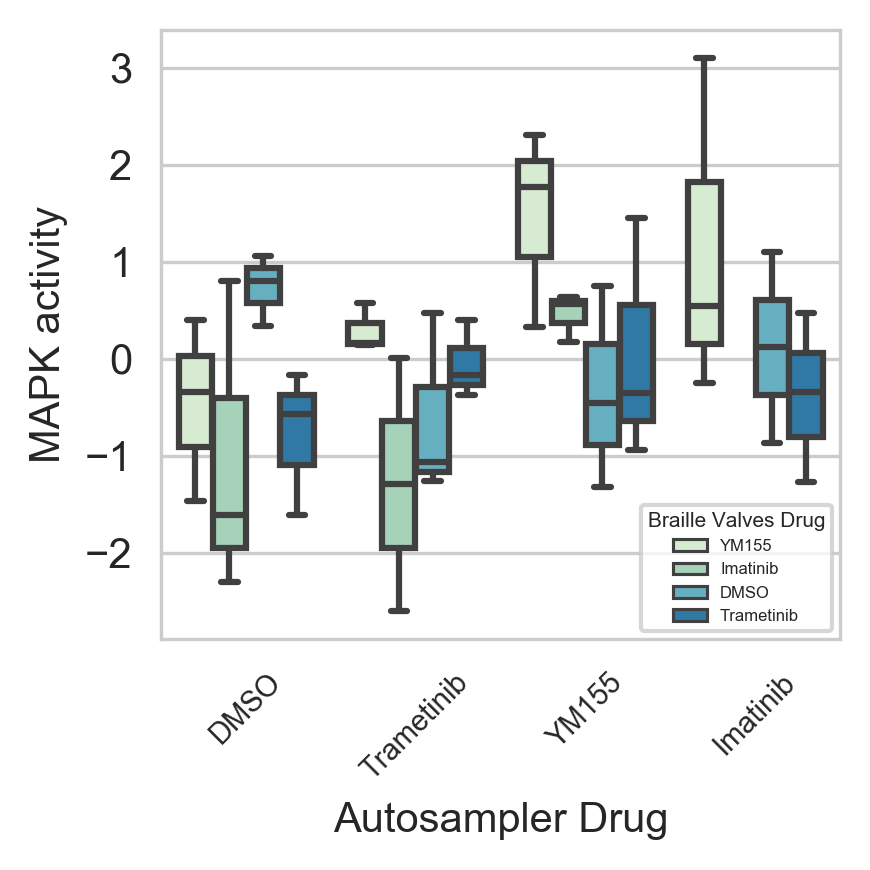

In [145]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('GnBu',4)
sns.boxplot(x=data['Drug1'], y=data['MAPK'], hue=data['Drug2'])
plt.xticks(rotation=45, size=7)
plt.xlabel('Autosampler Drug')
plt.ylabel('MAPK activity')
lgnd = plt.legend(fontsize=4, title='Braille Valves Drug', loc=4)
plt.setp(lgnd.get_title(),fontsize=5)
plt.tight_layout()
plt.savefig('../figures/Fig4x4rev//f4.pdf')

In [146]:
results = pd.DataFrame(index=progeny.columns, columns = ['Imatinib', 'YM155', 'Trametinib'])
results_p = pd.DataFrame(index=progeny.columns, columns = ['Imatinib', 'YM155', 'Trametinib'])
for pw in progeny.columns:
    print(pw)
    model = ols(pw + ' ~ Imatinib + YM155 + Trametinib', data).fit()
    results.loc[pw] = model.params[results.columns]
    results_p.loc[pw] = model.pvalues[results_p.columns]

Androgen
EGFR
Estrogen
Hypoxia
MAPK
NFkB
PI3K
TGFb
TNFa
Trail
VEGF
WNT
p53
JAK


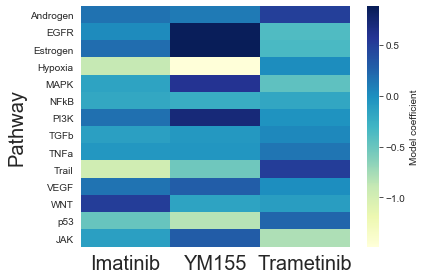

In [147]:
sns.heatmap(results.astype(float), cmap='YlGnBu', cbar_kws={'label': 'Model coefficient'})
plt.xticks(size=20)
plt.ylabel('Pathway', size=20)
plt.tight_layout()
plt.savefig('../figures/Fig4x4rev//f5.pdf')

In [148]:
results_p

,Imatinib,YM155,Trametinib
pathway,,,
Androgen,0.580341,0.696091,0.127386
EGFR,0.940045,0.00829581,0.246105
Estrogen,0.546941,0.0106223,0.311624
Hypoxia,0.0281378,0.000495131,0.977677
MAPK,0.689453,0.123305,0.248975
NFkB,0.590648,0.486269,0.615263
PI3K,0.627703,0.0587189,0.962931
TGFb,0.718631,0.830731,0.895482
TNFa,0.871126,0.892659,0.651605


### Large scale data qc

In [277]:
sns.set_palette('tab10')
data = pd.read_csv('../data/large_scale/large_scale_matrix_HGNC.csv', 
                                 sep=',', header=0, index_col=0)
sample_meta = pd.read_csv('../data/large_scale/large_scale_meta.csv',
                        sep=',', header=0, index_col=0)
gene_meta = pd.DataFrame(index=data.index)

In [278]:
sample_meta, gene_meta = qc.plot_qc(data, sample_meta, gene_meta, False)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


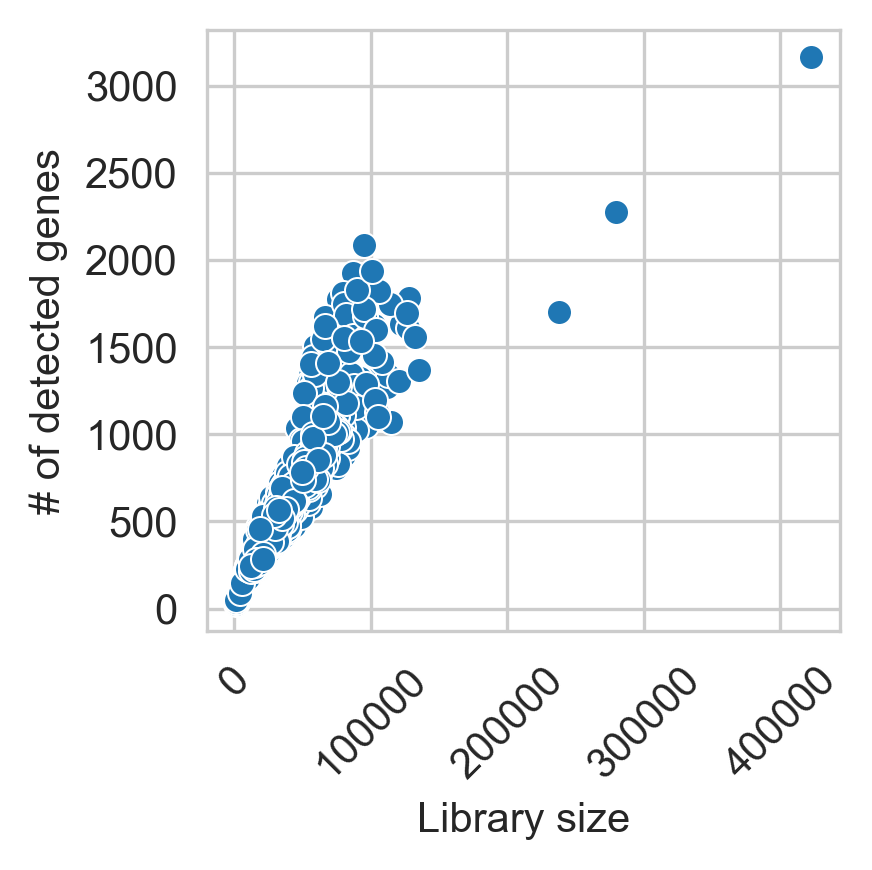

In [279]:
plt.figure(figsize=(3,3), dpi=300)
sns.scatterplot(sample_meta['Library_size'], sample_meta['Genes_expressed'])
plt.xlabel('Library size')
plt.ylabel('# of detected genes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../figures/QCL/f1.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


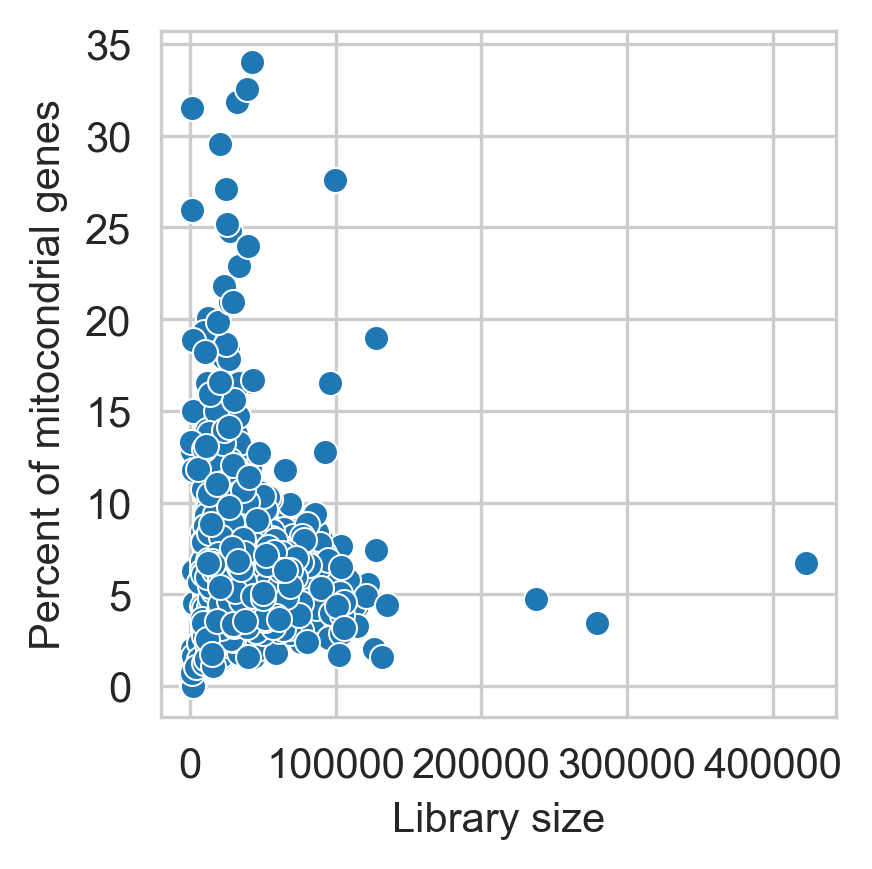

In [280]:
plt.figure(figsize=(3,3), dpi=300)
sns.scatterplot(sample_meta['Library_size'], sample_meta['Percent MT']*100)
plt.xlabel('Library size')
plt.ylabel('Percent of mitocondrial genes')
plt.tight_layout()
plt.savefig('../figures/QCL/f2.pdf')

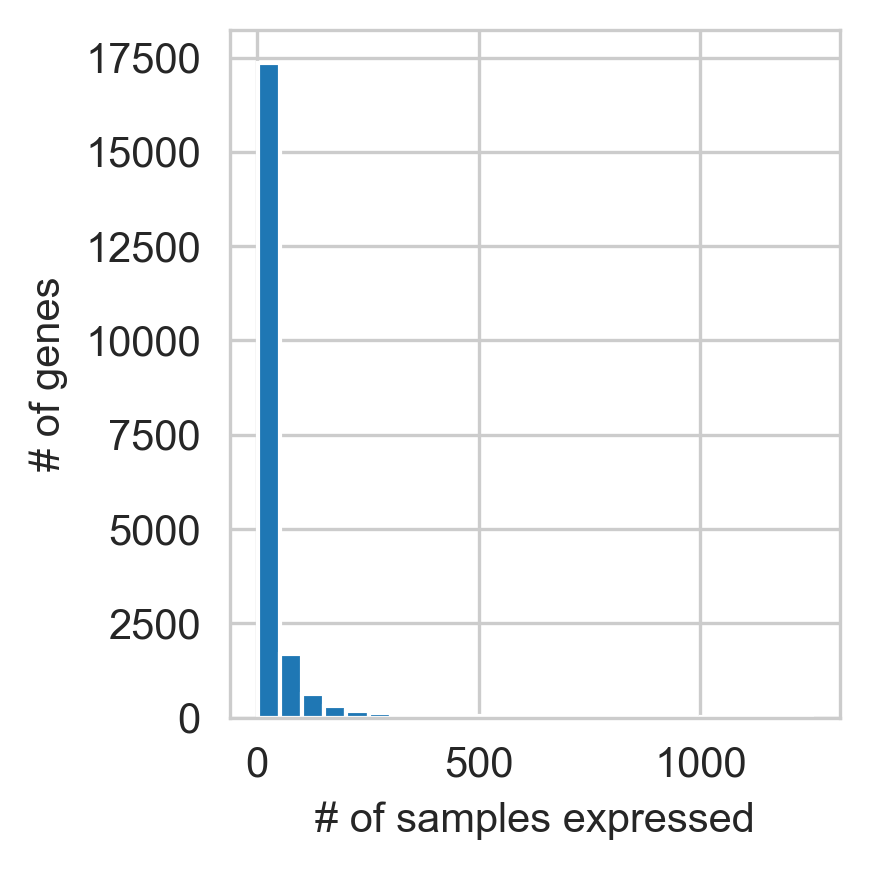

In [281]:
plt.figure(figsize=(3,3), dpi=300)
plt.hist(gene_meta['Expressed_samples'], bins=25)
plt.xlabel('# of samples expressed')
plt.ylabel('# of genes')
plt.tight_layout()
plt.savefig('../figures/QCL/f3.pdf')

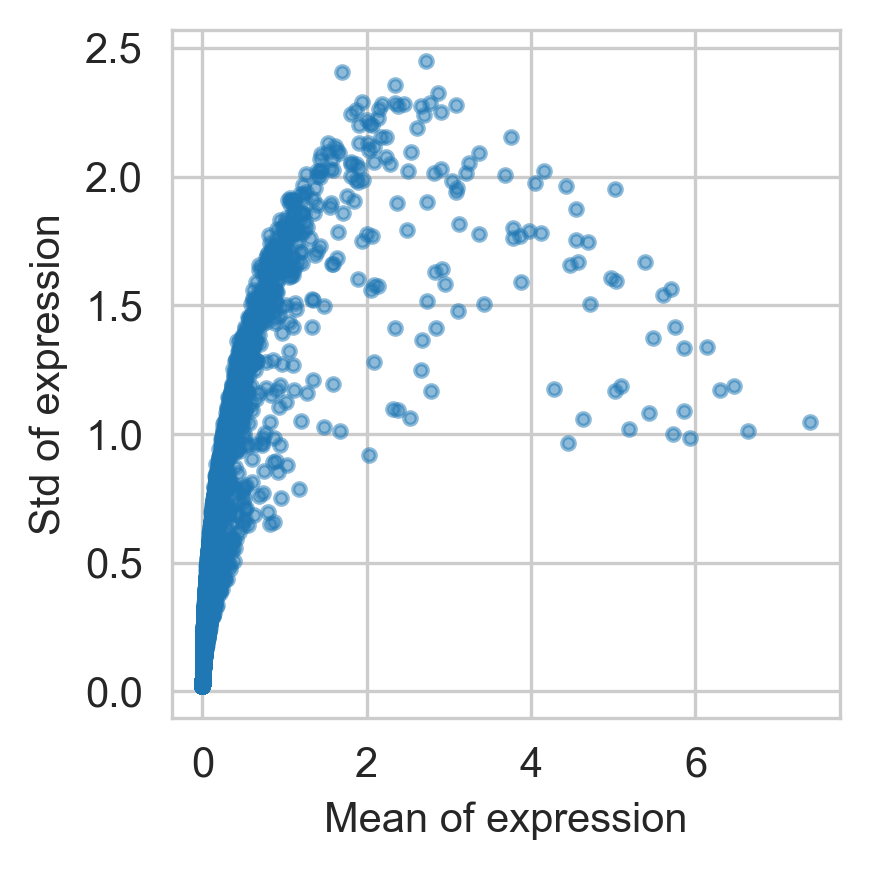

In [282]:
plt.figure(figsize=(3,3), dpi=300)
plt.plot(np.log1p(data).mean(1), np.log1p(data).std(1), '.', alpha=0.5)
plt.xlabel('Mean of expression')
plt.ylabel('Std of expression')
plt.tight_layout()
plt.savefig('../figures/QCL/f4.pdf')

In [283]:
sample_meta['Library_size'].median(), sample_meta['Genes_expressed'].median()

(32892.0, 547.0)

### Large scale clustering

In [19]:
data = pd.read_csv('../results/large_scale/filtered_HGNC_counts_300_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results/large_scale/filtered_HGNC_meta_300.csv',
                    sep=',', header=0, index_col=0)
meta = meta.loc[data.index]

In [20]:
fil = data.std() != 0
data = data[data.columns[fil]]

In [21]:
model = PCA()
data_pca = pd.DataFrame(model.fit_transform(data), index=data.index)
data_pca =data_pca.iloc[:,0:50]
np.random.seed(19890904)
model = TSNE(perplexity=10, learning_rate=50)
data_tsne = pd.DataFrame(model.fit_transform(data_pca), index=data.index)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit ke

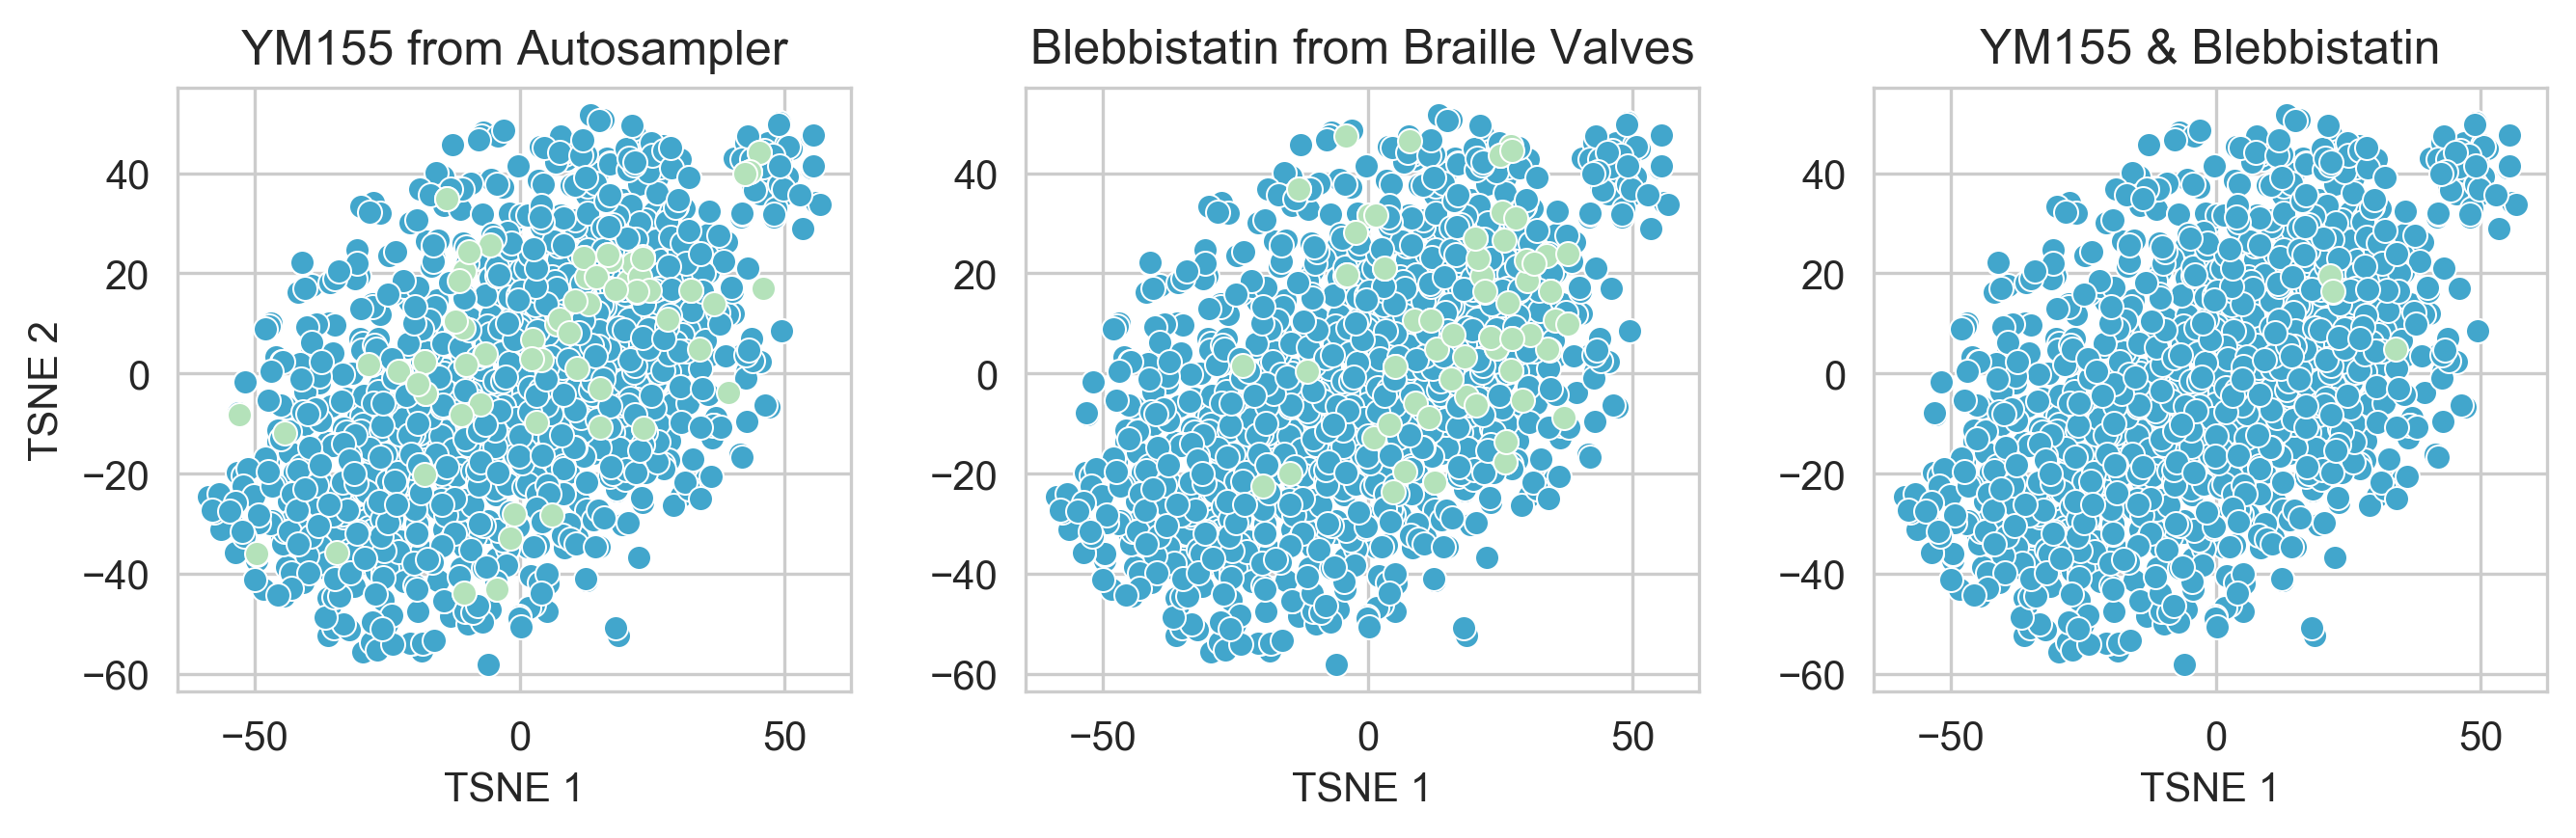

In [36]:
f, axs = plt.subplots(1, 3, figsize=(9, 3), dpi=300)
sns.set_palette('GnBu_r', 2)

sns.scatterplot(data_tsne[0], data_tsne[1], ax=axs[0])
fil = meta['Drug1']=='YM155'
sns.scatterplot(data_tsne[0][fil], data_tsne[1][fil], ax=axs[0])

sns.scatterplot(data_tsne[0], data_tsne[1], ax=axs[1])
fil = meta['Drug2']=='Blebbistatin'
sns.scatterplot(data_tsne[0][fil], data_tsne[1][fil], ax=axs[1])

sns.scatterplot(data_tsne[0], data_tsne[1], ax=axs[2])
fil = meta['Combo']=='YM155_Blebbistatin'
sns.scatterplot(data_tsne[0][fil], data_tsne[1][fil], ax=axs[2])
axs[0].legend().remove()
axs[1].legend().remove()
axs[2].legend().remove()
axs[0].set_title('YM155 from Autosampler')
axs[1].set_title('Blebbistatin from Braille Valves')
axs[2].set_title('YM155 & Blebbistatin')
for i in range(3):
    axs[i].set_xlabel('TSNE 1')
    axs[i].set_ylabel('')
axs[0].set_ylabel('TSNE 2')
plt.tight_layout()
plt.savefig('../figures/FigL/fig1.pdf')

In [22]:
results = pd.DataFrame(index=range(101), columns=['Drug1', 'Drug2', 'Combo'])
for c in results.columns:
    results.loc[0, c] = silhouette_score(data_pca, meta[c])
np.random.seed(19890904)
for i in range(1, 101):
    indexes = np.random.permutation(data_pca.index)
    for c in results.columns:
        results.loc[i, c] = silhouette_score(data_pca.loc[indexes].values, meta[c].values)
results.columns = ['Autosampler\nDrug', 'Braille Valves\nDrug', 'Combination']
results['Randomised'] = results.index
results = pd.melt(results, id_vars='Randomised', value_vars=results.columns[:-1], 
                  var_name='Clustering', value_name='Normalised score')
fil = results['Randomised'] == 0
results.loc[results.index[fil], 'Randomised'] = False
results.loc[results.index[~fil], 'Randomised'] = True

In [23]:
results[results['Randomised']==False]

,Randomised,Clustering,Normalised score
0,False,Autosampler\nDrug,-0.0123823
101,False,Braille Valves\nDrug,-0.029271
202,False,Combination,-0.104325


In [25]:
results[results['Randomised']==False]

,Randomised,Clustering,Normalised score
0,False,Autosampler\nDrug,-0.0123823
101,False,Braille Valves\nDrug,-0.029271
202,False,Combination,-0.104325


In [29]:
(results[results['Clustering']=='Combination']['Normalised score']<-0.104325).sum()

100

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 16.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


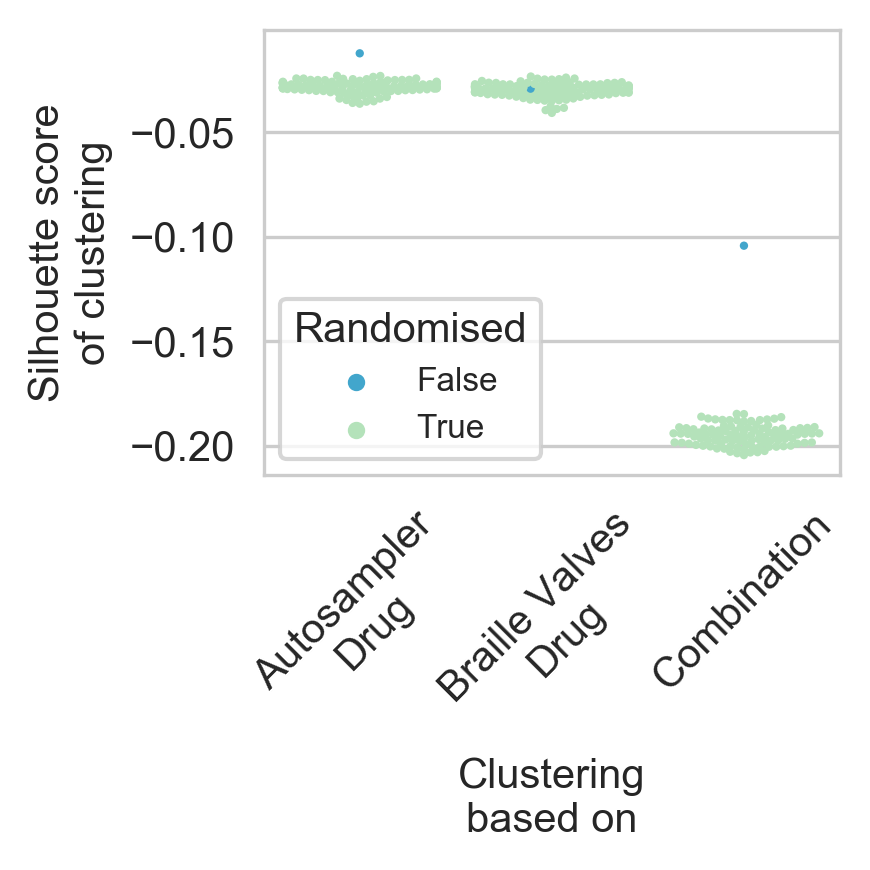

In [24]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('GnBu_r', 2)
sns.swarmplot(x=results['Clustering'], y=results['Normalised score'], hue=results['Randomised'],size=2)
plt.ylabel('Silhouette score\nof clustering')
plt.xticks(rotation=45)
plt.xlabel('Clustering\nbased on')
lgnd = plt.legend(fontsize=8, title='Randomised')
lgnd.legendHandles[0]._sizes = [10]
lgnd.legendHandles[1]._sizes = [10]
plt.tight_layout()
#plt.savefig('../figures/FigL//f2.pdf')

### Similarity to LINCS-L1000

In [923]:
data = pd.read_csv('../results/large_scale/filtered_HGNC_counts_100_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results/large_scale/filtered_HGNC_meta_100.csv',
                    sep=',', header=0, index_col=0)
meta = meta.loc[data.index]

In [924]:
lincs = pd.read_csv('../../SARS-CoV-2-repurposing/results/LINCS/signatures_lm_gene.csv',
                   sep=',', header=0, index_col=0)

In [925]:
genes = list(set(data.columns) & set(lincs.index))
data = data[genes]
for drug in list(set(meta['Drug1']) | set(meta['Drug2'])):
    data[drug] = 0
for i in meta.index:
    d1, d2 = meta.loc[i, ['Drug1', 'Drug2']]
    data.loc[i, d1] = 1
    data.loc[i, d2] = 1

In [926]:
del data['DMSO']

In [927]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = pd.DataFrame(index=genes, columns = list(set(data.columns) - set(genes)))

In [928]:
for gene_ in genes:
    try:
        model = ols(gene_ + ' ~ ' + ' + '.join(results.columns), data).fit()
        results.loc[gene_] = model.params[results.columns]
    except:
        pass

In [929]:
results.to_csv('../results/ls_lm_results.csv')

In [930]:
lincs = lincs.loc[genes]

In [931]:
drug_names = {
    'H7' : 'H-7',
    'Imatininb' : 'imatinib',
    'Fludarabine' : 'fludarabine',
    'AT9283' : 'AT-9283',
    'Blebbistatin' : 'blebbistatin',
    'Trametinib' : 'trametinib', 
    'NMS1286937' : 'NMS-1286937',
    'Sunitinib' : 'sunitinib',
    'Methotrexate' : 'methotrexate',
    'Olomucin' : 'olomoucine',
    'YM155' : 'YM-155',
    'PF562271' : 'PF-562271',
    'Streptozotocin' : 'streptozotocin',
    'Doxorubicin' : 'doxorubicin',
    'Fluoruracil' : 'fluorouracil',
    'Mitomycin' : 'mitomycin-c',
    'Triciribine' : 'triciribine',
    'Baricitinib' : 'baricitinib',
    'Dovitinib' : 'dovitinib',
    'Wortmannin' : 'wortmannin',
    'EPIRUBICIN' : 'epirubicin',
    'Sunitinib' : 'sunitinib',
    'Clofarabine' : 'clofarabine',
    'Dacarbazine' : 'dacarbazine',
    'AT9283' : 'AT-9283',
    'Gimeracil' : 'gimeracil', 
    'YM155' : 'YM-155',
    'Cytarabine' : 'cytarabine',
    'Decitabine' : 'decitabine',
    'Trametinib' : 'trametinib',
    'Gemcitabine' : 'gemcitabine',
    'Olomucin' : 'olomoucine'    
}

In [932]:
results = results[drug_names.keys()]
lincs = lincs[drug_names.values()]

In [933]:
data = pd.concat([results, lincs], 1)

In [934]:
sim = pd.DataFrame(spearmanr(data)[0], index=data.columns, columns=data.columns)

In [935]:
sim = sim.loc[lincs.columns, results.columns]
sim = sim.T

In [936]:
TP = pd.DataFrame(0, index=drug_names.keys(), columns=drug_names.values())
sim = sim.loc[drug_names.keys(), drug_names.values()]

In [937]:
for d1 in drug_names.keys():
    TP.loc[d1, drug_names[d1]] = 1

In [938]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [939]:
x,y, d = roc_curve(TP.values.reshape((1, -1))[0], sim.values.reshape((1, -1))[0])

0.5942281312651683


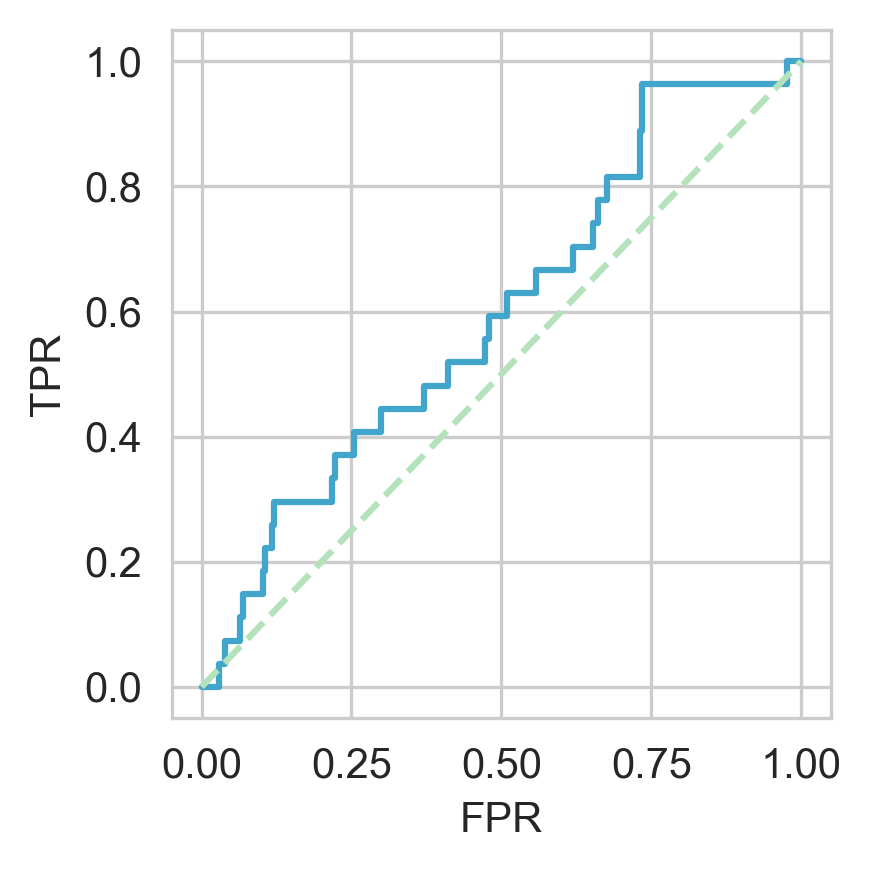

In [940]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('GnBu_r', 2)
plt.plot(x, y)
plt.plot([0,1], [0,1], '--')
roc_auc_score(TP.values.reshape((1, -1))[0], sim.values.reshape((1, -1))[0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.tight_layout()
plt.savefig('../figures/FigL/f3.pdf')
print(roc_auc_score(TP.values.reshape((1, -1))[0], sim.values.reshape((1, -1))[0]))

In [941]:
np.random.seed(19890904)
aucs = []
for i in range(1000):
    TP.index=np.random.choice(TP.index, len(TP.index), False)
    TP = TP.loc[sim.index]
    aucs.append(roc_auc_score(TP.values.reshape((1, -1))[0], sim.values.reshape((1, -1))[0]))

0.019000000000000017

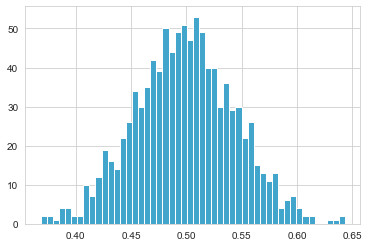

In [942]:
plt.hist(aucs, bins=50)
1 - (np.array(aucs) <= 0.5942281312651683).sum() / len(aucs)

### Drug synergy

### Preprocess synergy

In [31]:
layout = pd.read_excel('../data/synergy_validation/200811_full_screen.xlsx',
                      sheet_name=0)
layout = layout.iloc[2:-1,-2:]
layout.columns = ['Drug1', 'Drug2']
layout.index = range(1,13)
layout['Score'] = 0.0

In [32]:
for plate in range(1,13):
    data = pd.read_excel('../data/synergy_validation/200811_full_screen.xlsx', sheet_name=13-plate, skiprows=30, 
                         skipfooter=4, index_col=0)
    drug1 = layout.loc[plate, 'Drug1']
    drug2 = layout.loc[plate, 'Drug2']
    results = pd.DataFrame(index = range(5), columns=range(5))
    results.index.name = drug1
    results.columns.name = drug2
    results.loc[0,0] = data.iloc[6,:6].mean()
    for d1 in range(1,5):
        results.loc[d1, 0] = data.iloc[5, [4-d1, 8-d1, 12-d1]].mean()
    for d2 in range(1,5):
        results.loc[0, d2] = data.iloc[4, [14-3*d2, 13-3*d2, 12-3*d2]].mean()
    for d1 in range(1,5):
        for d2 in range(1,5):
            results.loc[d1,d2] = data.iloc[4-d1, [14-3*d2, 13-3*d2, 12-3*d2]].mean()
    results = results / results.loc[0, 0]
    expected = pd.DataFrame(index=range(1,5), columns=range(1,5))
    for d1 in range(1, 5):
        for d2 in range(1, 5):
            expected.loc[d1,d2] = results.loc[d1, 0] * results.loc[0, d2]
    synergy = (expected - results.iloc[1:,1:])
    layout.loc[plate, 'Score'] = synergy.mean().mean()

In [33]:
layout['Drug1'] = layout['Drug1'].str.lower()
layout['Drug2'] = layout['Drug2'].str.lower()

In [34]:
drug_name_dict = {
    'dacarabizine' : 'dacarbazine',
    'doxorubicin' : 'doxorubicin',
    'imatinib' : 'imatininb',
    'razoxane' : 'razoxane',
    'trametinib' : 'trametinib',
    'triciribine' : 'triciribine',
    'ym115' : 'ym155',
    'ym155' : 'ym155'
}

In [35]:
for i in layout.index:
    for drug in ['Drug1', 'Drug2']:
        layout.loc[i, drug] = drug_name_dict[layout.loc[i, drug]]

In [36]:
layout['Ordered']=''
for i in layout.index:
    d1, d2 = layout.loc[i, ['Drug1', 'Drug2']]
    if d1<d2:
        layout.loc[i, 'Ordered'] = d1+'_'+d2
    else:
        layout.loc[i, 'Ordered'] = d2+'_'+d1
        

In [37]:
layout.index = layout['Ordered']

In [38]:
layout.to_csv('../results/synergy_valid.csv')

### Cell viaiblity prediction

In [37]:
data = pd.read_csv('../results/large_scale/filtered_HGNC_counts_300_sc.csv',
                  sep=',', header=0, index_col=0)
meta = pd.read_csv('../results/large_scale/filtered_HGNC_meta_300.csv',
                    sep=',', header=0, index_col=0)
meta = meta.loc[data.index]

In [38]:
#meta['Drug1'] = meta['Drug1'].str.lower()
#meta['Drug2'] = meta['Drug2'].str.lower()
#meta['Combo'] = meta['Combo'].str.lower()
for i in meta.index:
    d1, d2 = meta.loc[i, ['Drug1', 'Drug2']]
    if d1<d2:
        meta.loc[i, 'Ordered'] = d1+'_'+d2
    else:
        meta.loc[i, 'Ordered'] = d2+'_'+d1

In [39]:
gex = pd.read_csv('../../NAR2019_revision/results/Achilles/signatures_merged_lm.csv', sep=',',
                 header=0, index_col=0)

In [40]:
viab = pd.read_csv('../../NAR2019_revision/results/Achilles/sig_info_merged_lm.csv',
                  sep=',', header=0, index_col=0)

In [41]:
gene_info = pd.read_csv('../../NAR2019_revision/data/LINCS/GSE92742/GSE92742_Broad_LINCS_gene_info.txt',
                       sep='\t', header=0, index_col=0)
gene_info.index = gene_info.index.astype(str)
fil = gene_info['pr_is_lm'] == 1
gene_info = gene_info[fil]
gene_info = gene_info['pr_gene_symbol']
gex.columns = gene_info[gex.columns]

In [42]:
genes = set(data.columns) & set(gex.columns)
gex = gex[genes]

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from scipy.stats import pearsonr

In [44]:
np.random.choice(19890904)
model = Ridge()
model.fit(gex, viab['shRNA_abundance'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.3173087555395456, 0.0)

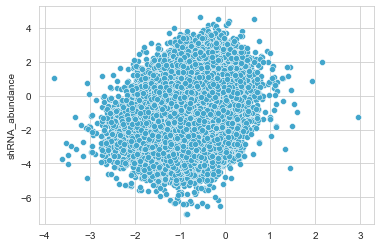

In [45]:
sns.scatterplot(model.predict(gex), viab['shRNA_abundance'])
pearsonr(model.predict(gex), viab['shRNA_abundance'])

In [46]:
y_pr = model.predict(data[genes])

In [47]:
meta['Viability'] = y_pr

In [48]:
syn_pred = meta.groupby(['Drug1', 'Drug2']).mean()['Viability'].reset_index()
syn_pred = pd.pivot_table(syn_pred, index='Drug1', columns='Drug2', values='Viability')

In [49]:
syn_pred.to_csv('../results/synergy_predict.csv')

### Make plots

In [50]:
syn_pred = pd.read_csv('../results/synergy_predict.csv', sep=',', header=0, index_col=0)

In [51]:
fil= syn_pred.isna()

In [52]:
syn_pred[fil] = syn_pred.median().median()

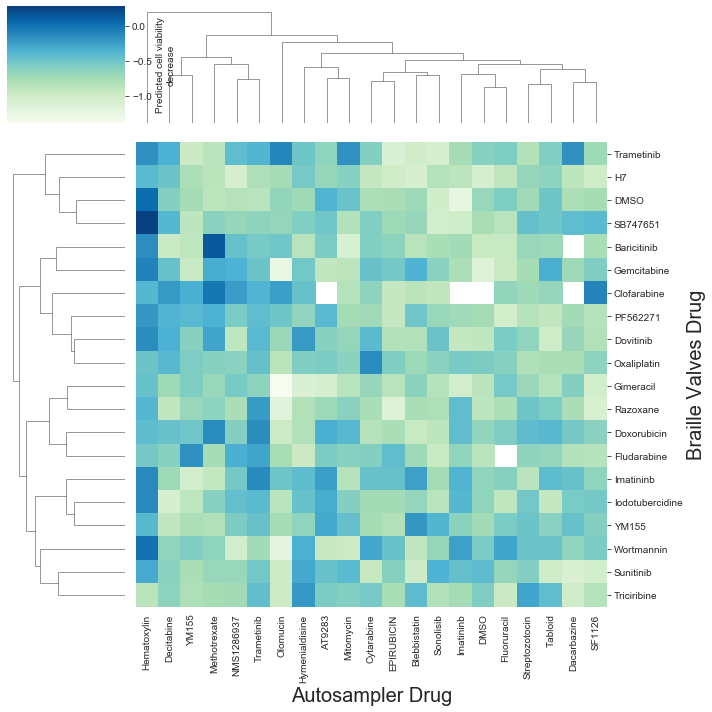

In [53]:
g = sns.clustermap(syn_pred, method='ward',cmap='GnBu', mask=fil, 
                   cbar_kws={'label': 'Predicted cell viability\ndecrease'})
g.ax_heatmap.set_xlabel('Autosampler Drug', size=20)
g.ax_heatmap.set_ylabel('Braille Valves Drug', size=20)
plt.tight_layout()
plt.savefig('../figures/FigL/f4.pdf')

In [54]:
meta['Ordered'] = meta['Ordered'].str.lower()


In [55]:
prediction = meta.groupby('Ordered').mean()['Viability']

In [56]:
syn_valid = pd.read_csv('../results/synergy_valid.csv', sep=',', header=0, index_col=0)

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


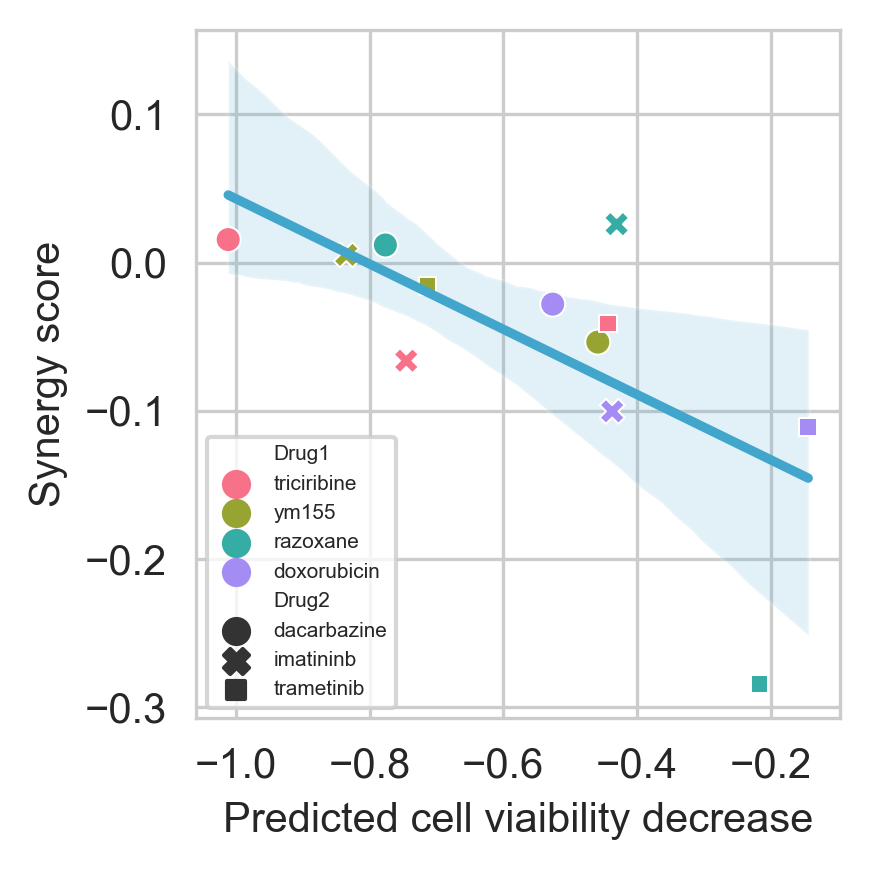

In [57]:
plt.figure(figsize=(3,3), dpi=300)
sns.regplot(prediction[syn_valid.index], syn_valid['Score'], scatter=False)
sns.scatterplot(prediction[syn_valid.index], syn_valid['Score'], hue=syn_valid['Drug1'], style=syn_valid['Drug2'])
plt.legend(fontsize=5, loc=3)
pearsonr(prediction[syn_valid.index], syn_valid['Score'])
plt.xlabel('Predicted cell viaibility decrease')
plt.ylabel('Synergy score')
plt.tight_layout()
plt.savefig('../figures/FigL/f5.pdf')

In [58]:
pearsonr(prediction[syn_valid.index], syn_valid['Score'])

(-0.6661979230331031, 0.018010257571274918)